<a href="https://colab.research.google.com/github/Aman78695/Car_Price_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Video Link

In [ ]:
https://drive.google.com/drive/folders/1Rd7wQmhoBA9WAjgeX4qPiFSs25dAzW9Z?usp=sharing

## Data Analysis Process

1. Asking Questions
2. Data Wrangling<br>
    a. Gathering Data
        - i. CSV files
        - ii. APIs
        - iii. Web Scraping
        - iv. Databases
    b. Assessing Data<br>
    c. Cleaning Data
3. Exploratory Data Analysis
4. Drawing Conclusion
5. Comunicating Results

### 1. Data Wrangling

- Data Gathering
- Data Accessing
- Data Cleaning

### 1b. Data Accessing

In this step, the data is to be understood more deeply. Before implementing methods to clean it, we will definitely need to have a better idea about what the data is about.

### Types of Unclean Data
There are 2 kinds of unclean data


- Dirty Data (Data with Quality issues): Dirty data, also known as low quality data. Low quality data has content issues.

Duplicated data<br>
Missing Data<br>
Corrupt Data<br>
Inaccurate Data

- Messy Data (Data with tidiness issues): Messy data, also known as untidy data. Untidy data has structural issues.Tidy data has the following properties:

Each variable forms a column<br>
Each observation forms a row<br>
Each observational unit forms a table

In [65]:
#importing libraries
import pandas as pd  # Importing the pandas library for data manipulation and analysis.
import numpy as np  # Importing the NumPy library for numerical operations and array handling.
import matplotlib.pyplot as plt  # Importing the matplotlib library for creating visualizations.
import seaborn as sns  # Importing the seaborn library for statistical data visualization.

from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Importing the MinMaxScaler and StandardScaler for data scaling.
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and testing sets.
from sklearn.linear_model import LinearRegression  # Importing LinearRegression for implementing linear regression models.
from sklearn.metrics import r2_score  # Importing r2_score for calculating the coefficient of determination.
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error for calculating the mean squared error.

import warnings  # Importing warnings to manage warning messages.
warnings.filterwarnings('ignore')  # Ignoring warning messages to avoid clutter.




##Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

##Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [66]:
#importing the datasets
dataset=pd.read_csv('/content/CarPrice_project (1).csv')

In [67]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

In [68]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [69]:
dataset.shape

(205, 26)

In [70]:
#overall information about data and its type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [71]:
#statistical functionality of datasets
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##Summary of the Dataset:

1. The dataset represents information about various cars, including their car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, and price.

2. The car_ID column is a unique identifier for each car in the dataset, while the symboling column denotes the risk rating of the car.

3. The CarName column contains the name of each car, and the fueltype column indicates whether the car uses gas or another type of fuel.

4. The aspiration column specifies the type of aspiration for the car (e.g., standard or turbo).

5. The doornumber column denotes the number of doors in the car (e.g., two or four).

6. The carbody column represents the body type of the car, such as convertible, hatchback, or sedan.

7. The drivewheel column indicates the type of drivewheel the car has (e.g., front-wheel drive or rear-wheel drive).

8. The dataset also includes numerical features such as wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, and price, which provide information about the car's specifications, performance, and price.


9. The price column represents the target variable, which is the price of the car.

##Column Description:-
- Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

- CarName: Name of car company (Categorical)

- fueltype: Car fuel type i.e gas or diesel (Categorical)

- aspiration: Aspiration used in a car (Categorical)

- doornumber: Number of doors in a car (Categorical)

- carbody: body of car (Categorical)

- drivewheel: type of drive wheel (Categorical)

- enginelocation: Location of car engine (Categorical)

- wheelbase: Weelbase of car (Numeric)

- carlength: Length of car (Numeric)

- carwidth: Width of car (Numeric)

- carheight: height of car (Numeric)

- curbweight: The weight of a car without occupants or baggage. (Numeric)

- enginetype: Type of engine. (Categorical)

- cylindernumber: cylinder placed in the car (Categorical)

- enginesize: Size of car (Numeric)

- fuelsystem: Fuel system of car (Categorical)

- boreratio: Boreratio of car (Numeric)

- stroke: Stroke or volume inside the engine (Numeric)

- compressionratio: compression ratio of car (Numeric)

- horsepower: Horsepower (Numeric)

- peakrpm: car peak rpm (Numeric)

- citympg: Mileage in city (Numeric)

- highwaympg: Mileage on highway (Numeric)

- price(Dependent variable): Price of car (Numeric)

In [72]:
#null values
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [73]:
#duplicate values
dataset.duplicated().sum()

0

##Why do EDA
- Model building<br>
- Analysis and reporting<br>
- Validate assumptions<br>
- Handling missing values<br>
- feature engineering<br>
- detecting outliers

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [74]:
#checking skewness of the price column
dataset['price'].skew()

1.7776781560914454

<Axes: xlabel='price', ylabel='Density'>

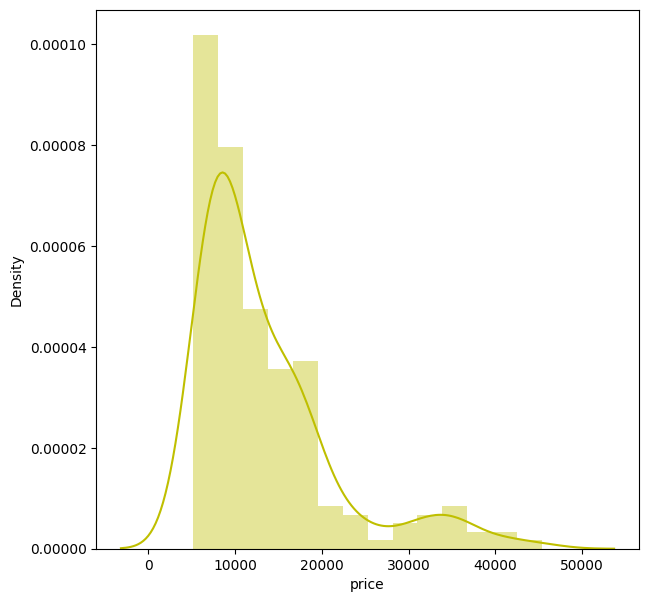

In [75]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(dataset['price'],color="y")

- **The price column is right skewed and it is kind of log normally distributed hence we will take the lof of the column to convert into normal distributed.**

- **sns.distplot() is a useful tool for getting a visual summary of the distribution of a univariate dataset. It helps in understanding the shape, central tendency, spread, and skewness of the data, allowing us to make initial observations and inform further analysis or modeling decisions.**

##Why we convert right or left skewed data to normal distribution?

Converting right or left skewed data to a normal distribution is often desirable for several reasons:

1. Assumption of Normality: Many statistical techniques and models assume that the data follows a normal distribution. By transforming skewed data to approximate a normal distribution, we can satisfy this assumption and ensure the validity of these methods.

2. Improved Interpretability: Normal distributions have well-defined properties, such as mean and standard deviation, which are easier to interpret and compare. Transforming skewed data to normality can enhance the interpretability of the data and facilitate meaningful analysis.

3. Better Model Performance: Some models, such as linear regression or ANOVA, assume normality of the residuals. When the response variable or predictors are skewed, transforming them to a normal distribution can improve the model's performance, leading to more accurate predictions and reliable inference.

4. Symmetry and Balance: Skewed data may introduce bias or imbalances in the analysis. Transforming the data to normality can help achieve symmetry, reduce the impact of outliers, and ensure a more balanced representation of the underlying distribution.

5. Statistical Tests: Certain statistical tests, like t-tests or chi-square tests, assume normality in order to provide reliable results. By transforming skewed data to approximate a normal distribution, we can meet the assumptions required for these tests, ensuring accurate and meaningful hypothesis testing.

It's important to note that the specific transformation method used (e.g., logarithmic, square root, Box-Cox) depends on the nature of the skewness and the characteristics of the data.

<Axes: xlabel='price', ylabel='Density'>

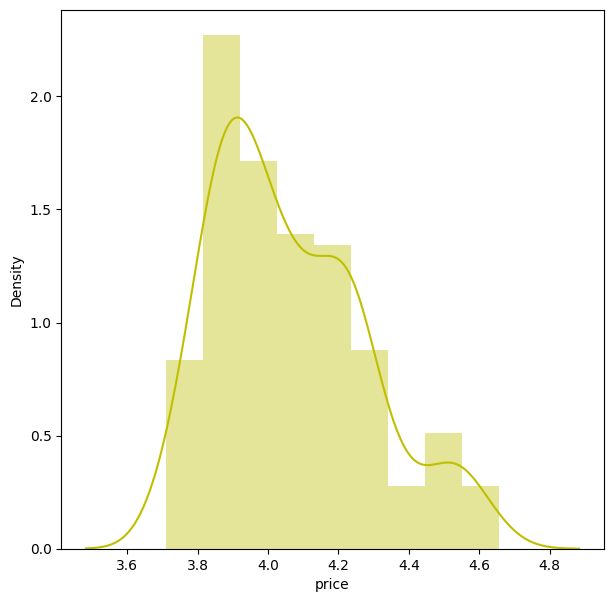

In [76]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['price']),color="y")

In [77]:
#converting price column to normal dist by taking log of it.
dataset['price']=np.log10(dataset['price'])

In [78]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,4.130173
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,4.217484
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,4.217484
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,4.144574
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,4.241795


In [79]:
#creating list of numeric columns
numeric_features = dataset.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [80]:
for col in numeric_features[1:]:
  print(col,'--',dataset[col].skew())

symboling -- 0.21107227205788776
wheelbase -- 1.0502137758714858
carlength -- 0.1559537713215604
carwidth -- 0.904003498786254
carheight -- 0.06312273247192804
curbweight -- 0.681398189052588
enginesize -- 1.9476550452788108
boreratio -- 0.02015641810424137
stroke -- -0.6897045784233837
compressionratio -- 2.6108624576151533
horsepower -- 1.4053101543373119
peakrpm -- 0.07515872237118956
citympg -- 0.6637040288148164
highwaympg -- 0.5399971878746754
price -- 0.6728885339773306


Based on the values of skewness, we can classify the columns as follows:

- Right Skewed (Positive Skewness):
  - symboling
  - wheelbase
  - carwidth
  - curbweight
  - enginesize
  - compressionratio
  - horsepower
  - citympg
  - highwaympg
  - price

- Left Skewed (Negative Skewness):
  - stroke

- Approximately Symmetrical (Skewness close to 0):
  - carlength
  - carheight
  - boreratio
  - peakrpm



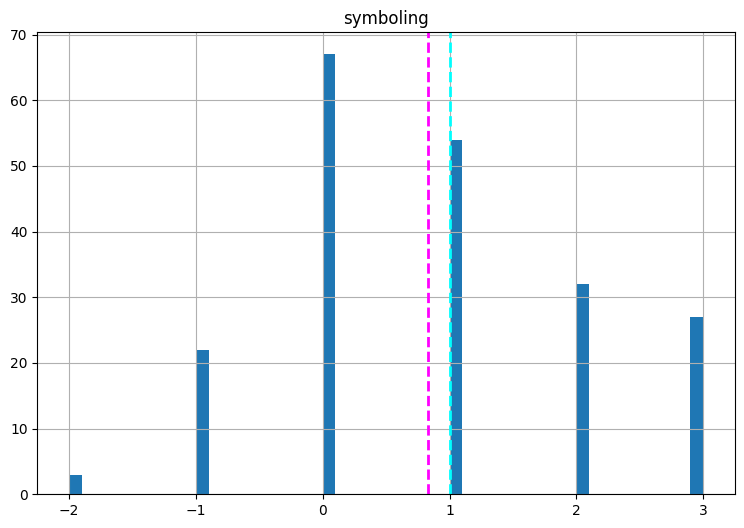

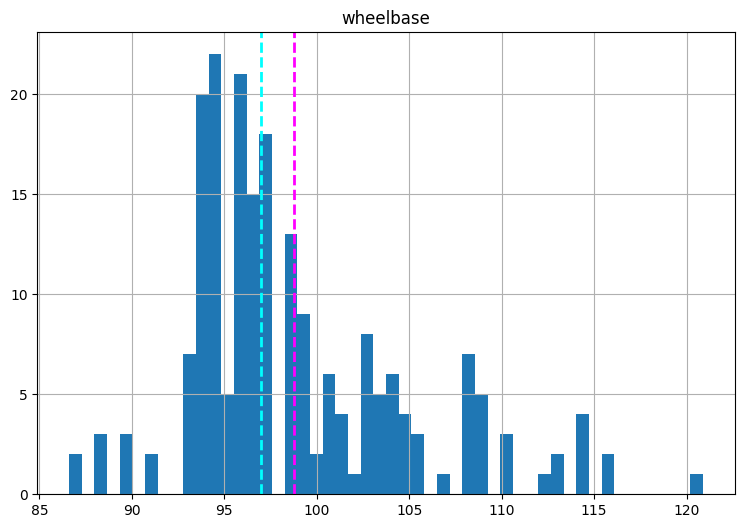

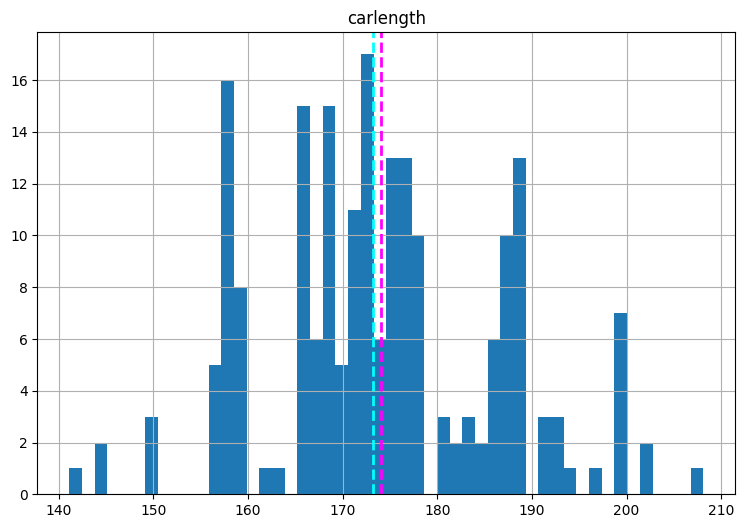

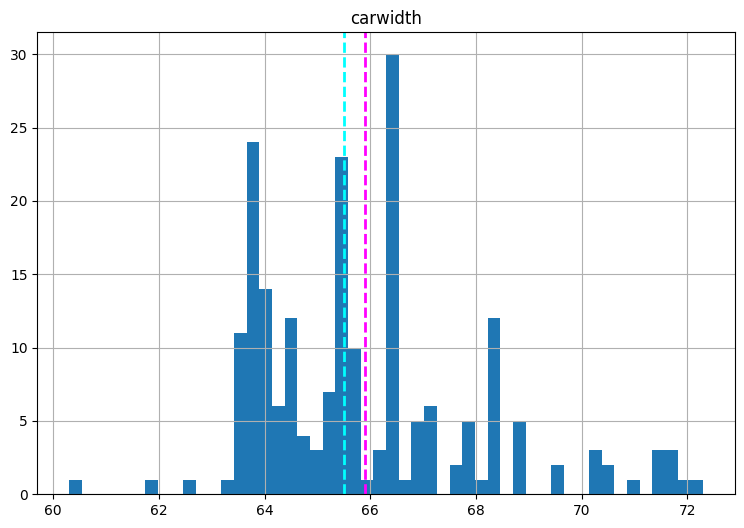

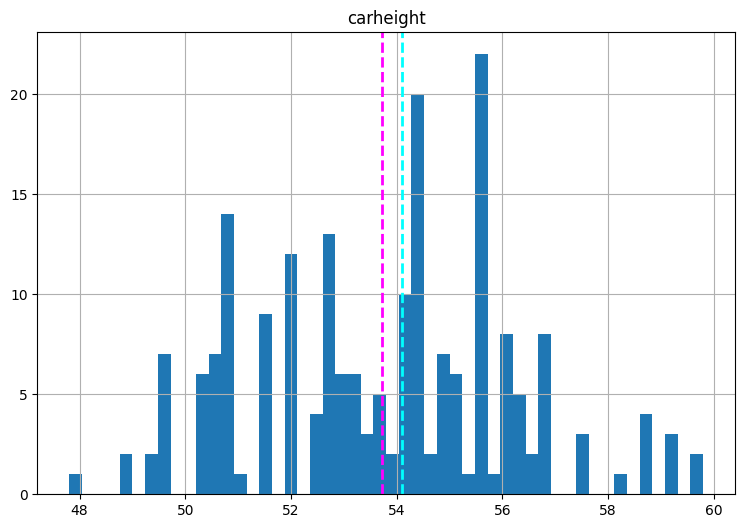

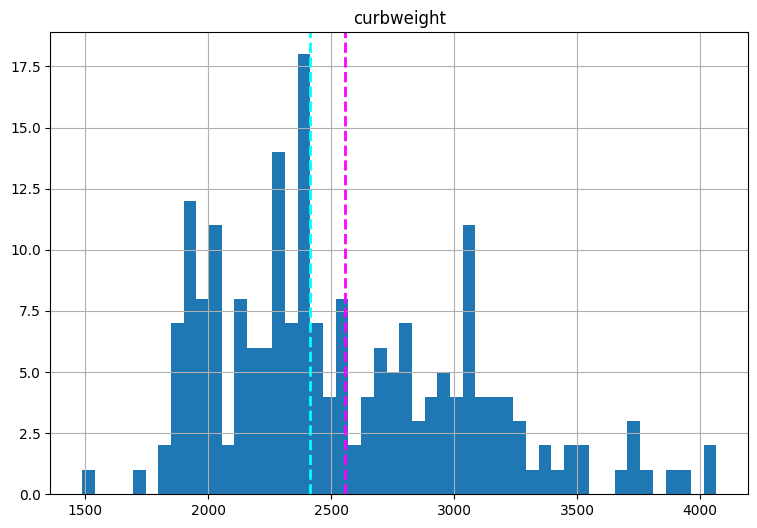

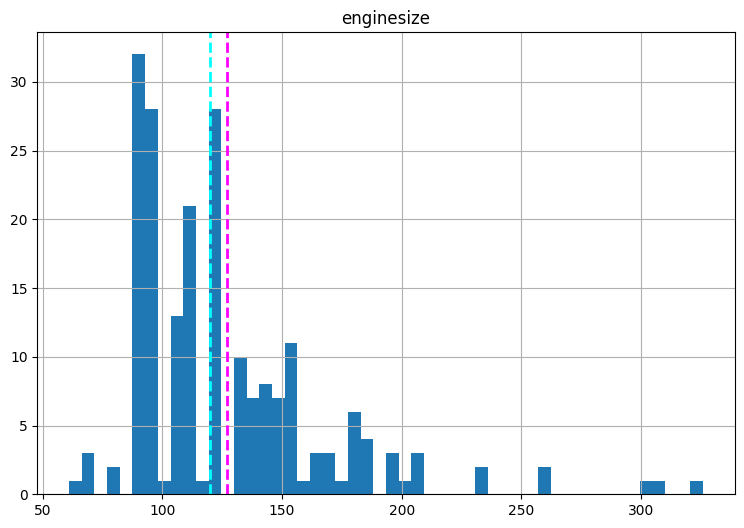

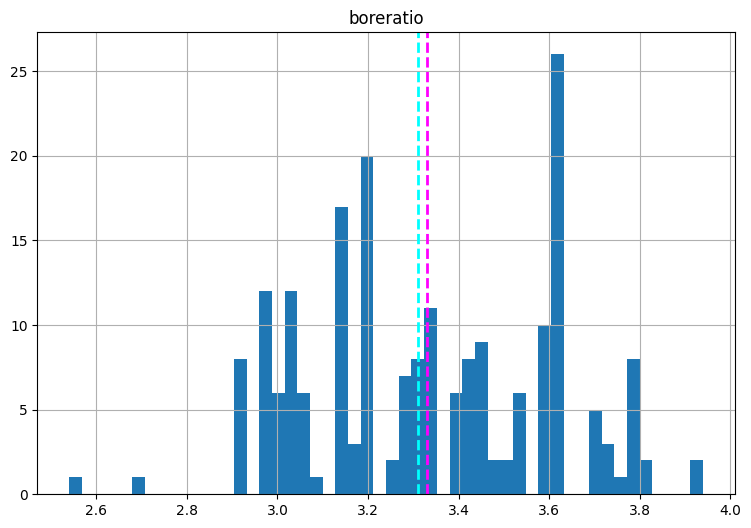

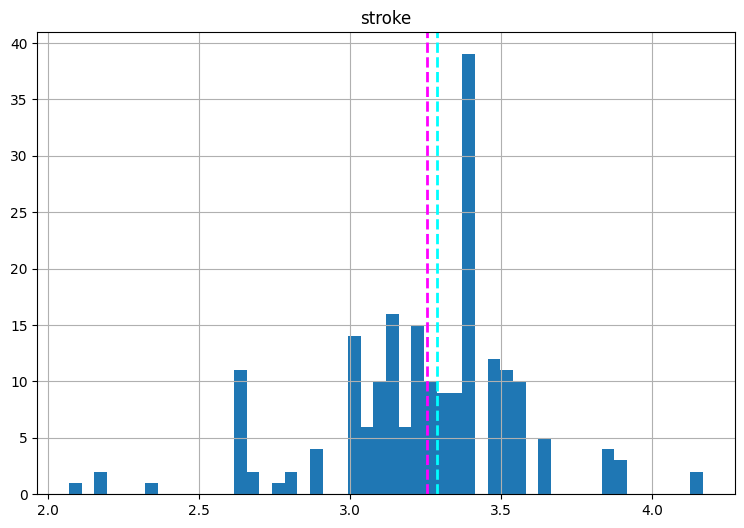

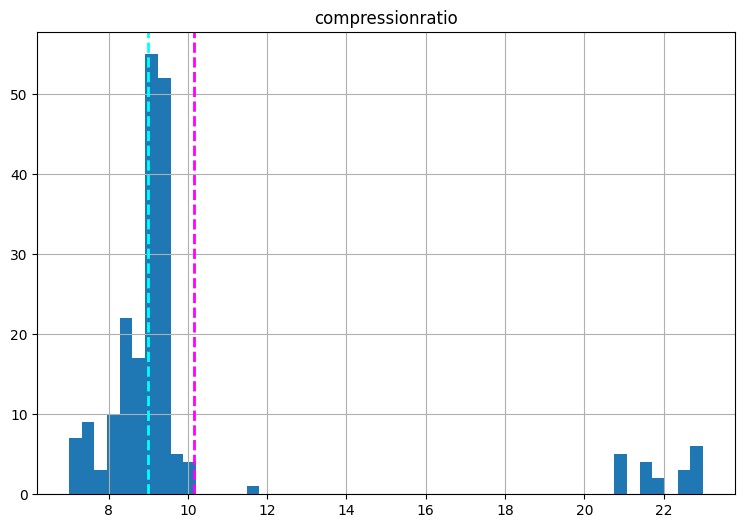

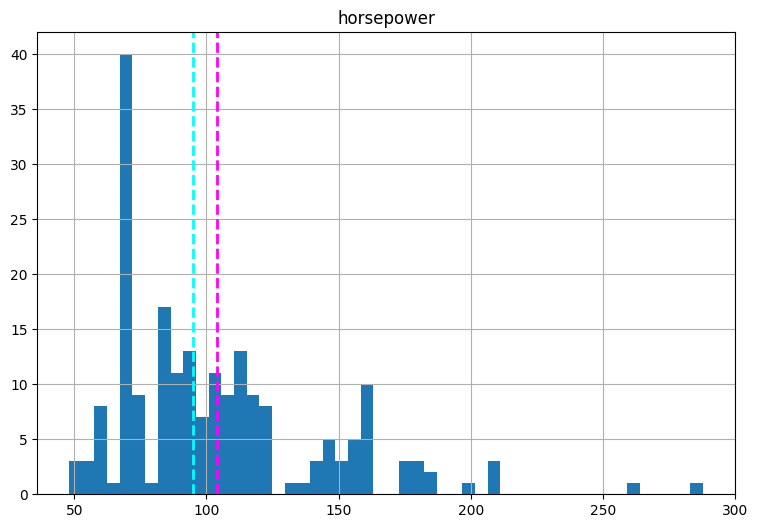

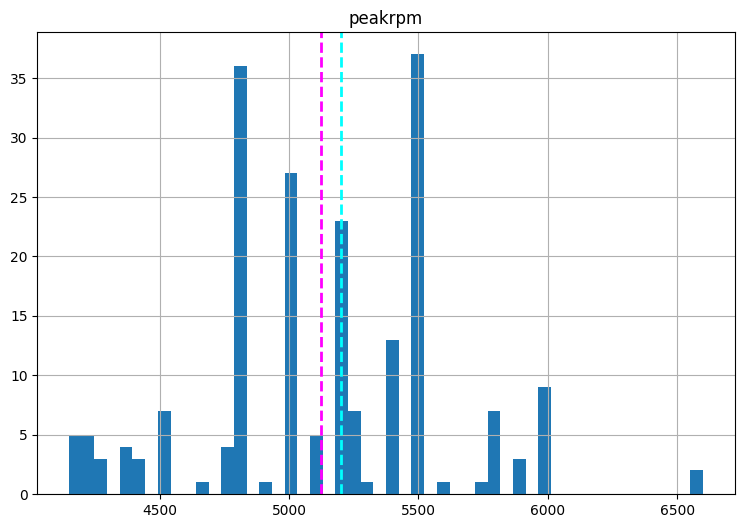

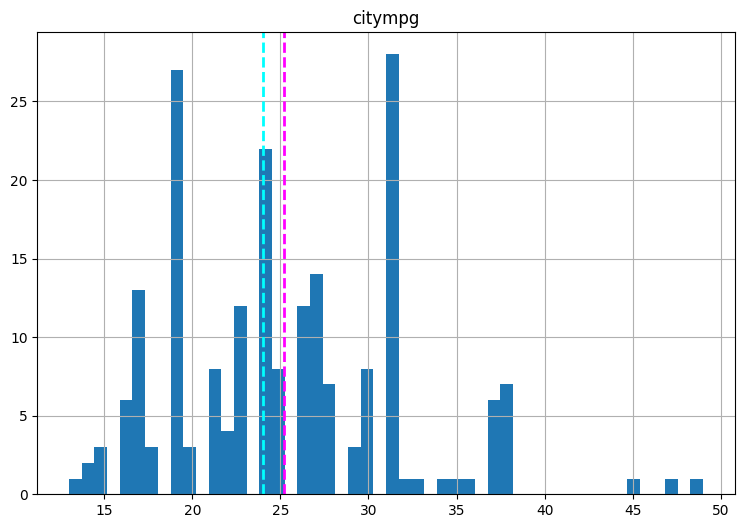

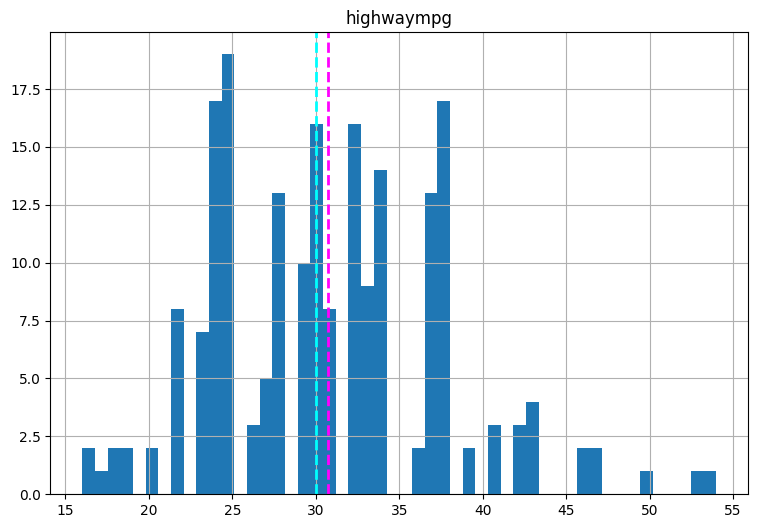

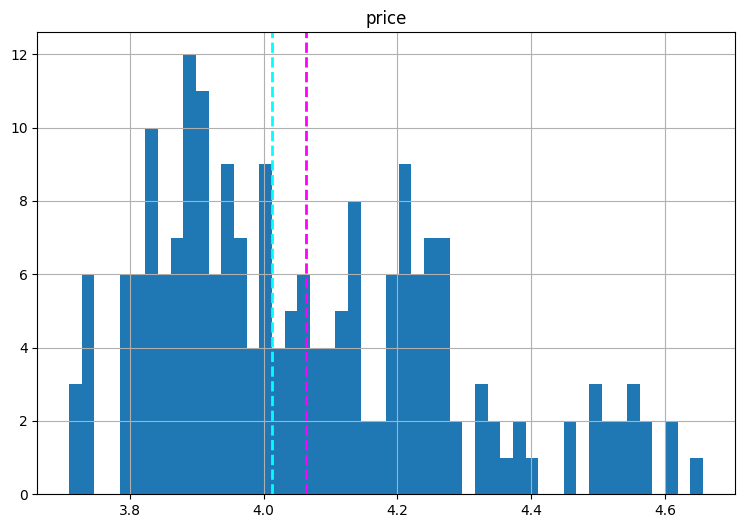

In [81]:
for col in numeric_features[1:]:    # This loop iterates over each numeric feature
    fig = plt.figure(figsize=(9, 6))   #This line creates a new figure object with a specified figure size of 9 inches by 6 inches.
    ax = fig.gca()                    #This line gets the current Axes object from the figure.
    feature = dataset[col]             #This line retrieves the values of the current feature (column) from the dataset.
    feature.hist(bins=50, ax = ax)      #This line plots a histogram for the current feature and assigns the histogram to the ax object.
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)   # This line adds a vertical dashed line at the mean of the feature
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)  #This line adds a vertical dashed line at the median of the feature
    ax.set_title(col)
plt.show()

Skewness measures the asymmetry of a distribution. If a variable exhibits significant skewness, it might be beneficial to apply a transformation to achieve a more symmetric distribution.One common transformation used to address positive skewness is the logarithmic transformation.

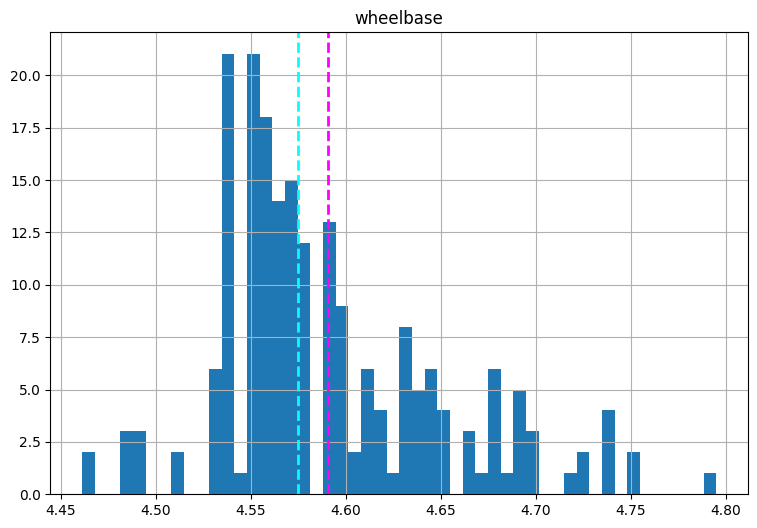

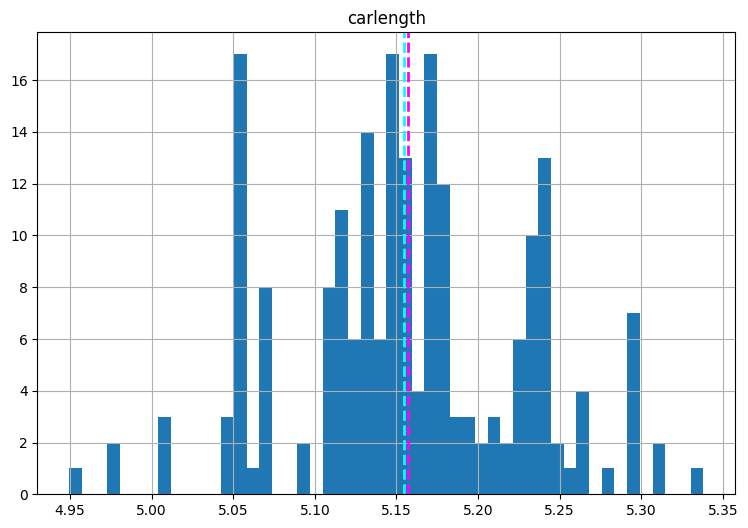

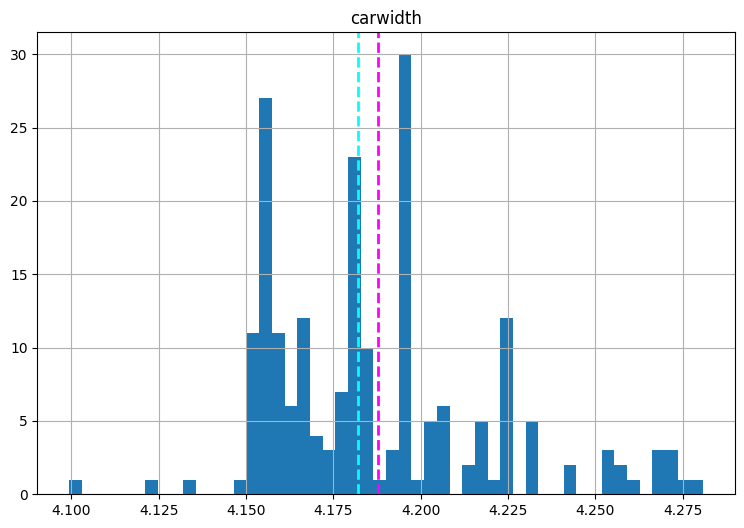

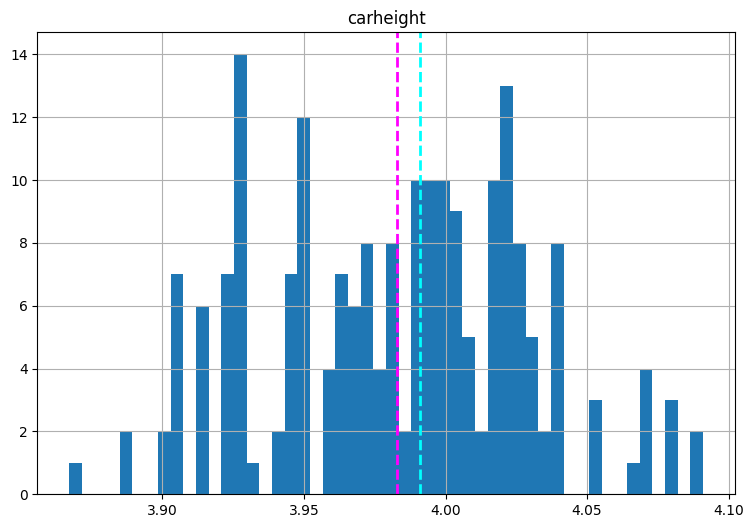

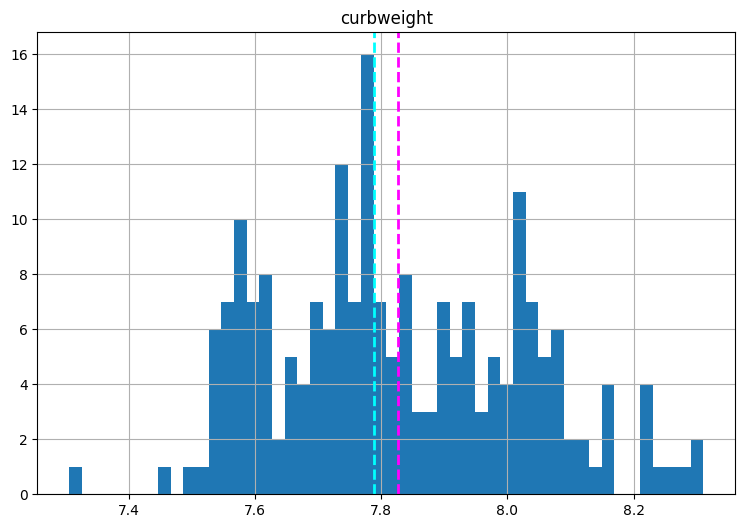

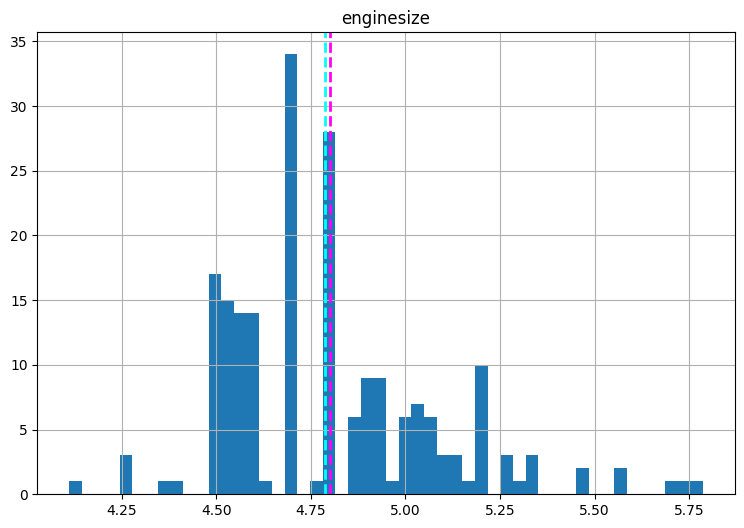

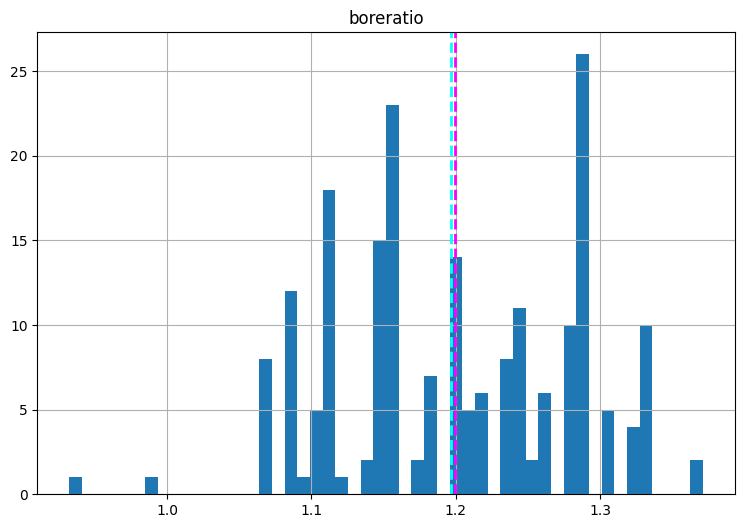

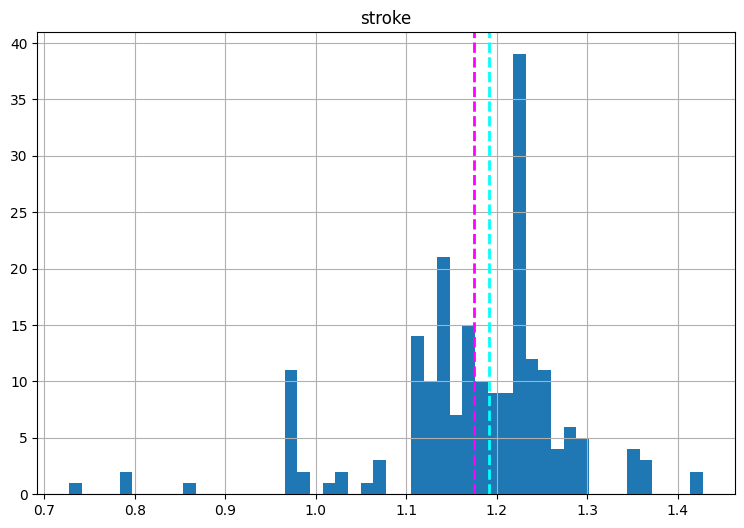

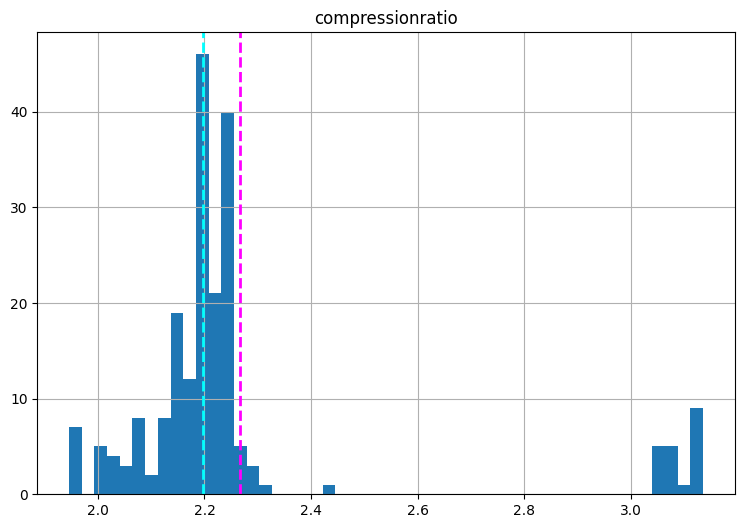

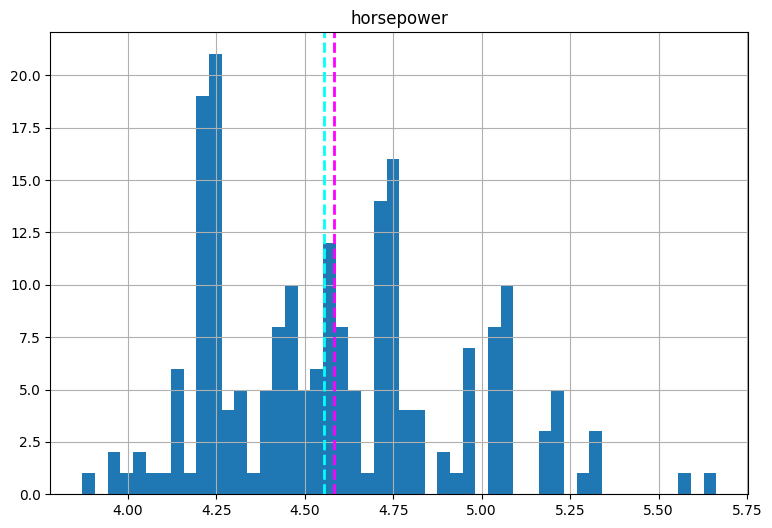

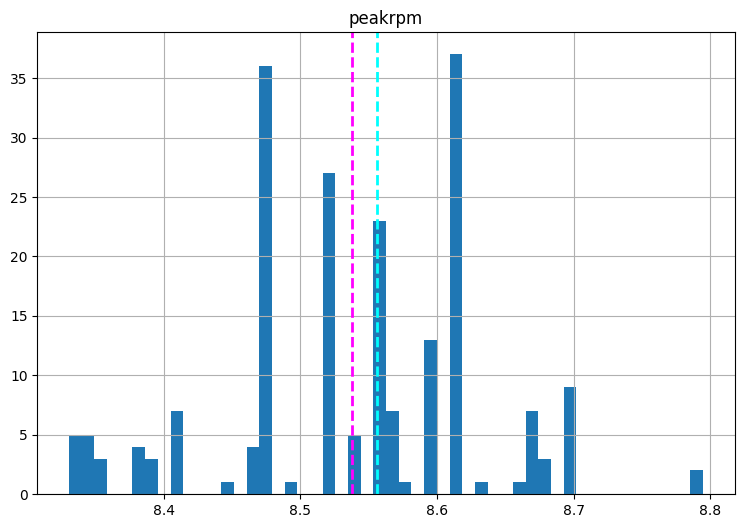

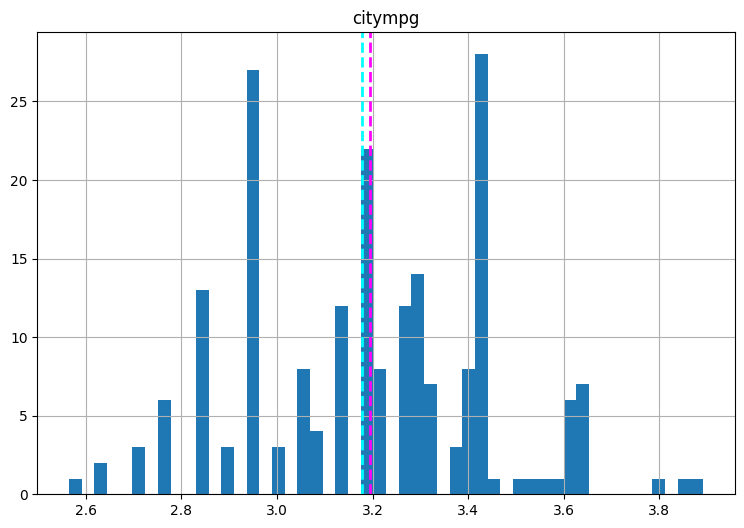

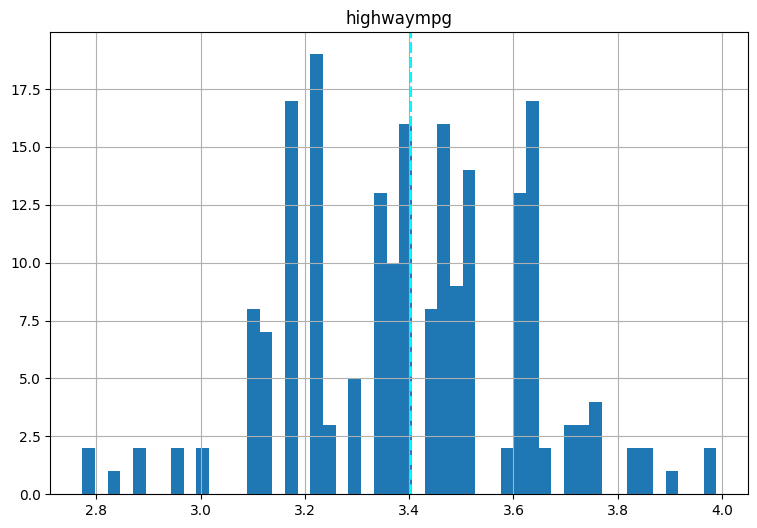

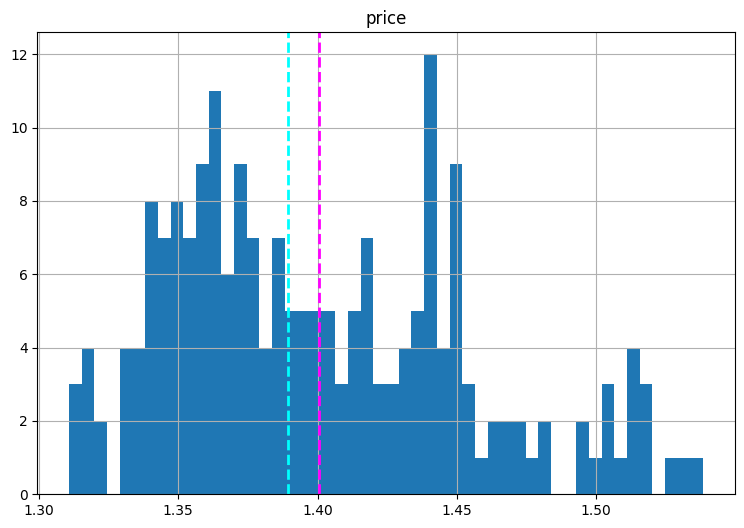

In [82]:
#checking the distribution of the data after applying log transformation
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [83]:
#applying log transformation on the column
for col in numeric_features[2:]:
  dataset[col] = np.log(dataset[col])

In [84]:
#checking the skewness in the data after log transformation
for col in numeric_features[1:]:
  print(col,'--',dataset[col].skew())

symboling -- 0.21107227205788776
wheelbase -- 0.8833870334608721
carlength -- -0.04719120889755608
carwidth -- 0.8139934659552381
carheight -- -0.04017845123618689
curbweight -- 0.27008988736886386
enginesize -- 0.8578276737148061
boreratio -- -0.13826638340889882
stroke -- -1.2603194505140336
compressionratio -- 2.349715616078379
horsepower -- 0.48283788836175356
peakrpm -- -0.19972952858664292
citympg -- 0.003106491126274955
highwaympg -- -0.12225518327651015
price -- 0.5692803721824481


After applying the logarithmic transformation to the numeric features in dataset, the skewness values have changed, but not significantly. It's important to note that the effect of the transformation on skewness can vary depending on the specific characteristics of the data.

If the logarithmic transformation did not sufficiently reduce the skewness, we can consider trying other transformations. Here are a few commonly used methods:

- Square root transformation: Replace the values with their square root.<br>
- Cube root transformation: Replace the values with their cube root.<br>
- Box-Cox transformation: This transformation allows for a range of power transformations, including the logarithmic transformation. It can automatically determine the best power transformation based on the data.

The Box-Cox and Yeo-Johnson transformations are methods used to transform data in order to achieve a more normal or symmetric distribution. Here's a brief explanation of each:

1. Box-Cox Transformation:
   - The Box-Cox transformation is a power transformation method that can handle positive data values.
   - It involves applying a power transformation to the data by raising it to a parameter, lambda (λ), which is determined based on the data itself.
   - The transformation can handle a range of power transformations, including the logarithmic transformation when λ is set to zero.
   - The optimal value of λ is selected to maximize the log-likelihood function, indicating the best transformation for normalizing the data.

2. Yeo-Johnson Transformation:
   - The Yeo-Johnson transformation is an extension of the Box-Cox transformation that can handle both positive and negative data values.
   - It is similar to the Box-Cox transformation, but it introduces a parameter to handle the sign of the data.
   - The transformation adjusts the data using a power transformation, similar to the Box-Cox transformation, but with an additional step to handle negative values.
   - The optimal power transformation and sign adjustment are determined to maximize the log-likelihood function and achieve a more symmetric distribution.

Both transformations aim to reduce skewness and make the data more normally distributed. They can be useful in scenarios where the data violates assumptions of normality in statistical analyses, as many statistical methods assume normally distributed data. However, it's important to note that the success of these transformations depends on the characteristics of the data and the specific context of the analysis.

#Feature Selection

Feature selection is the process of selecting a subset of relevant features from a larger set of available features in order to improve the performance and interpretability of a machine learning model. Here are a few common approaches to feature selection:

- Univariate Feature Selection:

- This method assesses the relationship between each feature and the target variable individually.<br>
- Statistical tests, such as chi-square for categorical targets or correlation for continuous targets, are used to rank features based on their importance.<br>
- The top-k features with the highest scores are selected.

In [85]:
from scipy import stats

In [86]:
# Apply Yeo-Johnson transformation
for col in numeric_features:
    dataset[col], _ = stats.yeojohnson(dataset[col])

In [87]:
#checking the skewness in the data after ye johnson transformation
for col in numeric_features[1:]:
  print(col,'--',dataset[col].skew())

symboling -- -0.06450765434140308
wheelbase -- 0
carlength -- -0.0007199393690430555
carwidth -- 0
carheight -- -0.004236846602687657
curbweight -- 0.0
enginesize -- 0.0
boreratio -- -0.023231731221975825
stroke -- 0.1271262031894828
compressionratio -- 0.0
horsepower -- 0.03411082133068913
peakrpm -- -0.0012168886116166264
citympg -- -0.00885139758648636
highwaympg -- -0.0015347488598783498
price -- 0.0


In [88]:
for col in numeric_features[1:-1]:
  print('price vs {} correlation is'.format(col),'-->',dataset[col].corr(dataset['price']))

price vs symboling correlation is --> -0.12031122406581693
price vs wheelbase correlation is --> 0.6165025529279071
price vs carlength correlation is --> 0.7921823137023496
price vs carwidth correlation is --> 0.8026239843505516
price vs carheight correlation is --> 0.17880975353227835
price vs curbweight correlation is --> 0.9043406493216789
price vs enginesize correlation is --> 0.8042914588671821
price vs boreratio correlation is --> 0.6231209940361214
price vs stroke correlation is --> 0.13756456074514328
price vs compressionratio correlation is --> -0.08196329753955833
price vs horsepower correlation is --> 0.8421917213523115
price vs peakrpm correlation is --> -0.09088440276633558
price vs citympg correlation is --> -0.8227660566911293
price vs highwaympg correlation is --> -0.8117466465601177


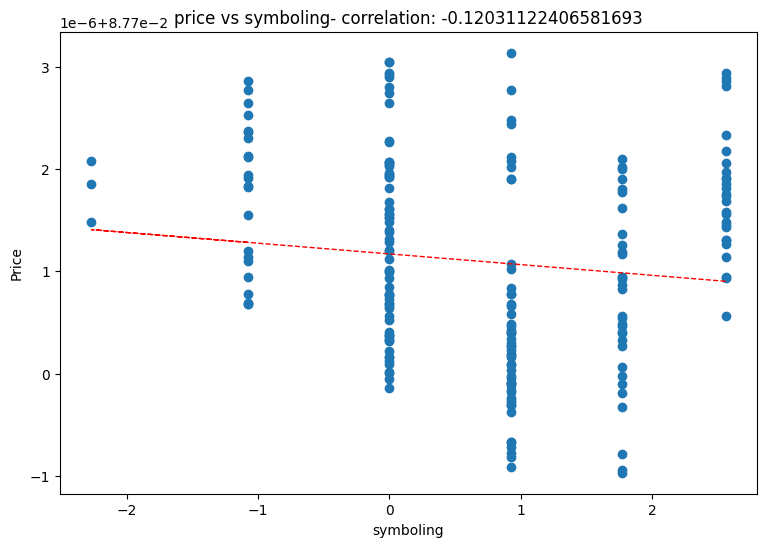

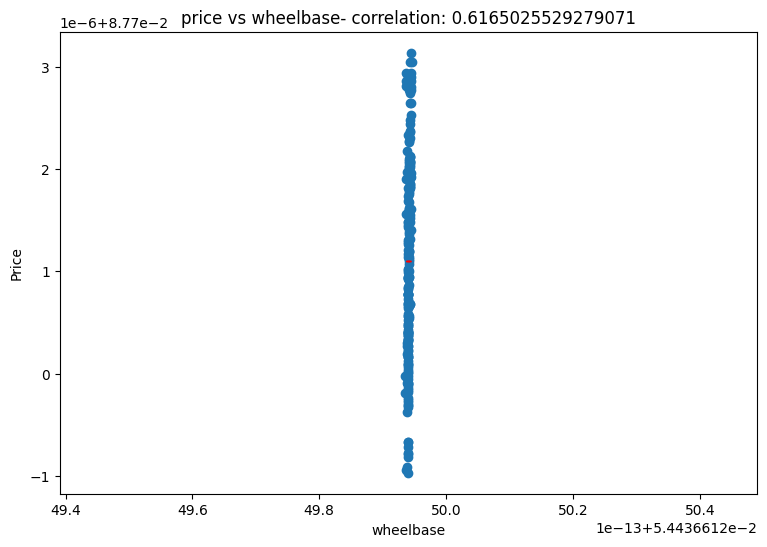

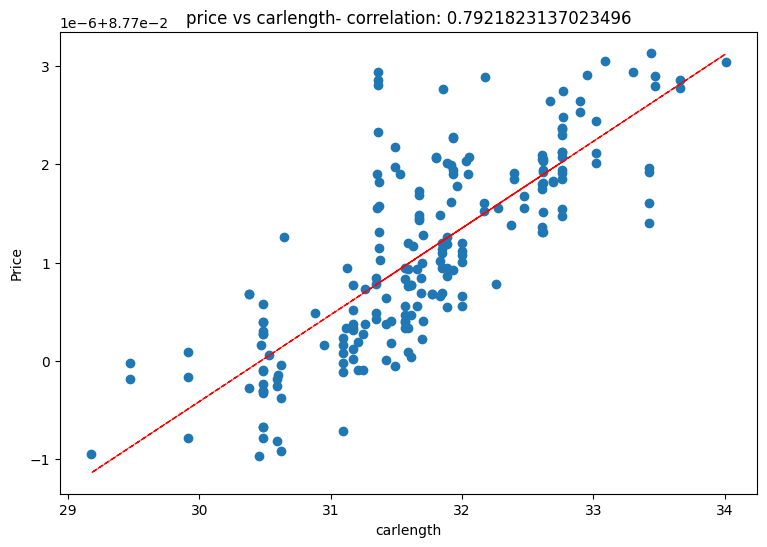

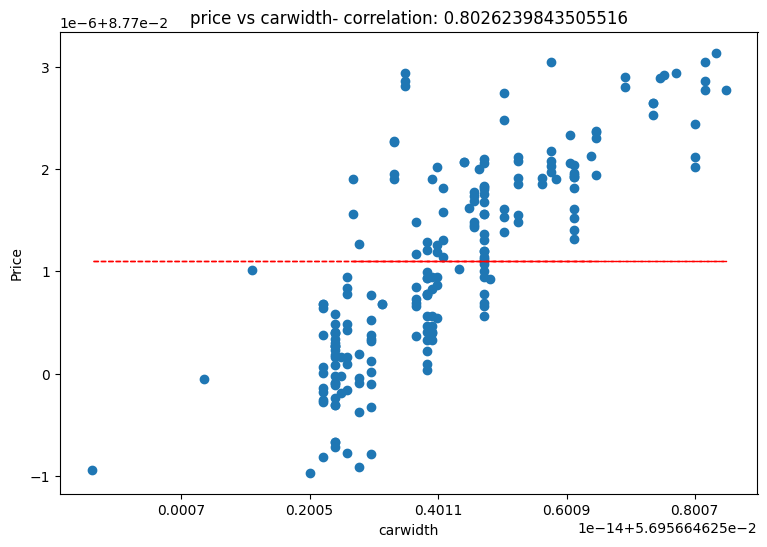

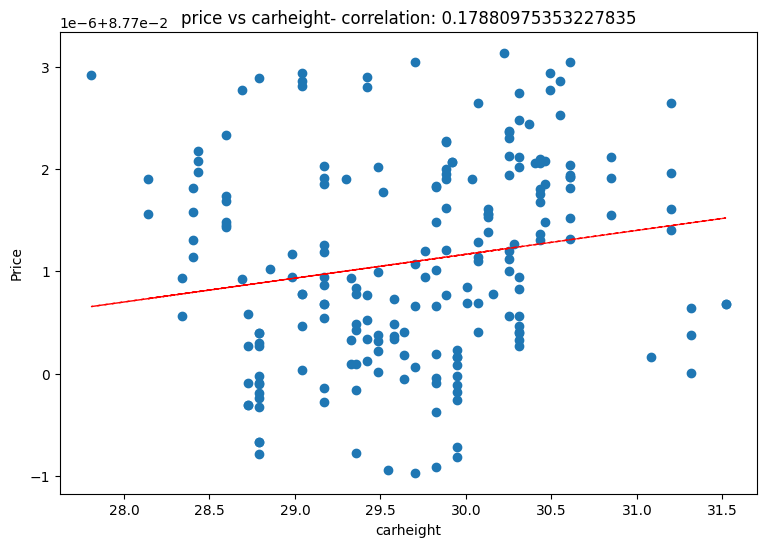

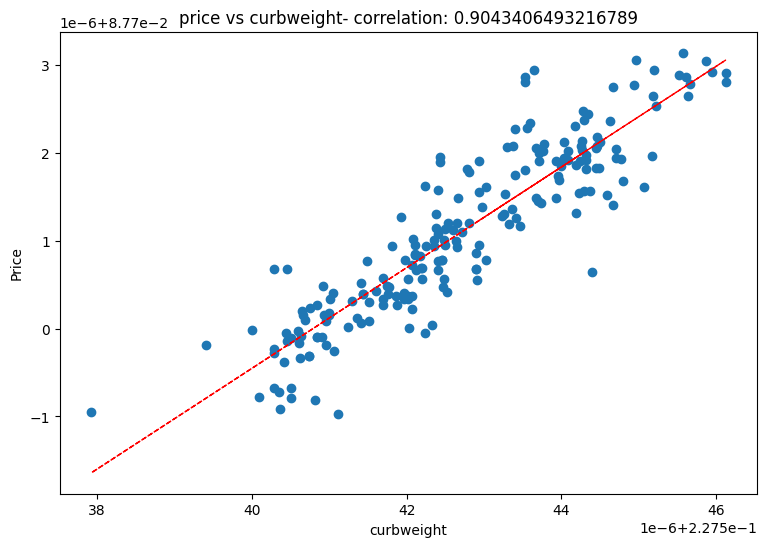

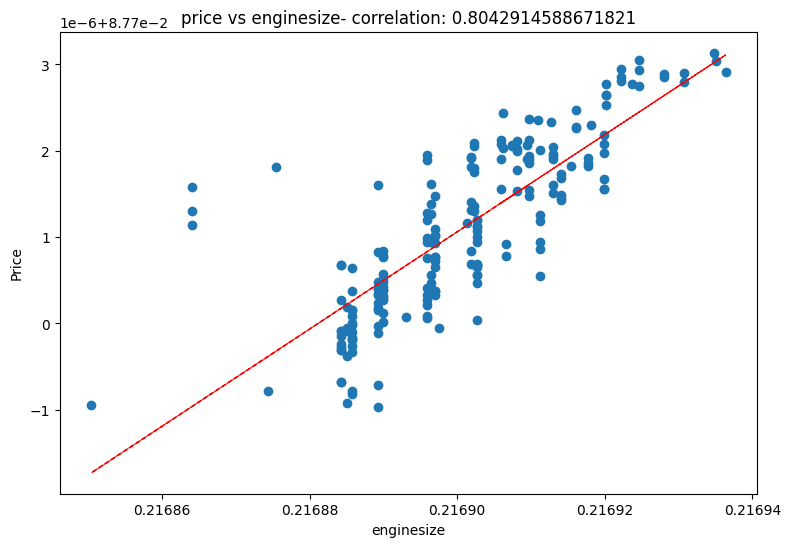

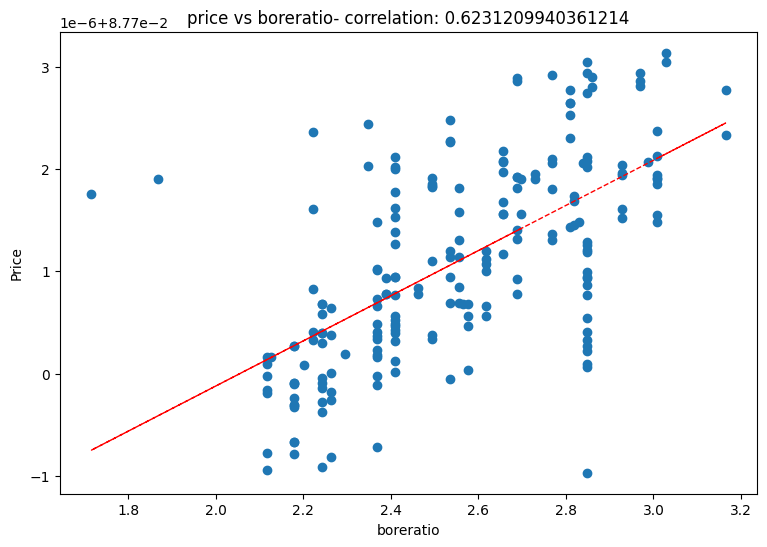

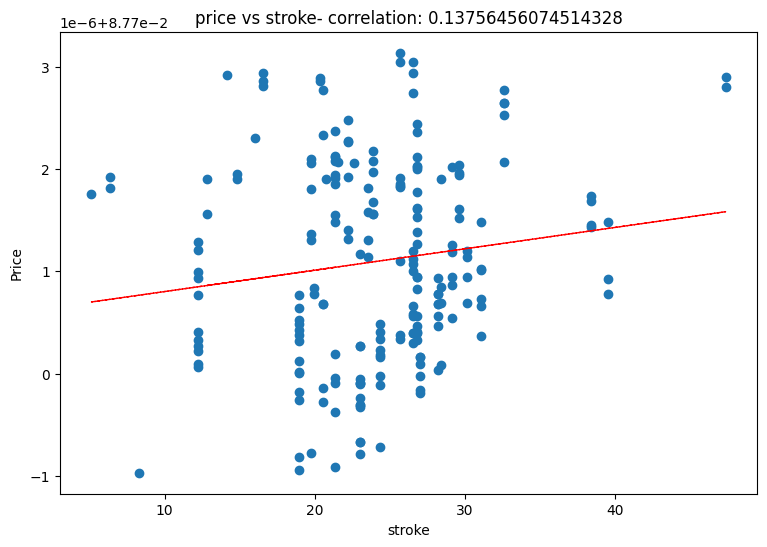

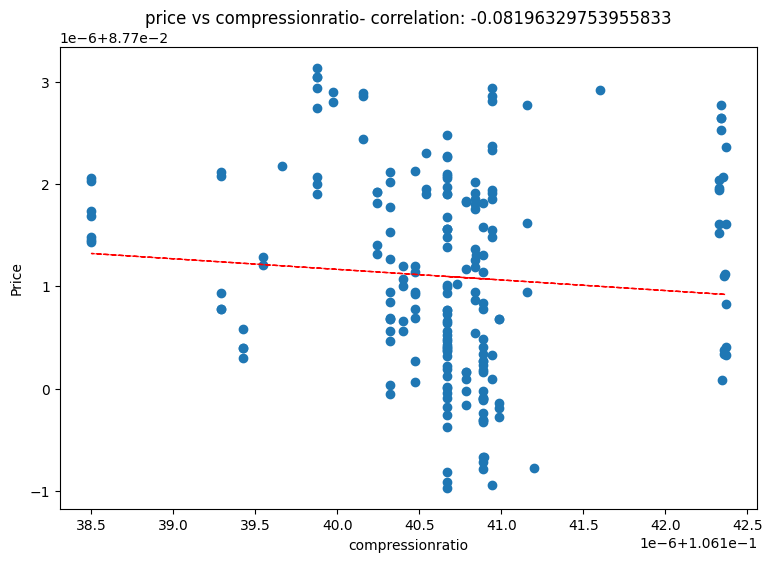

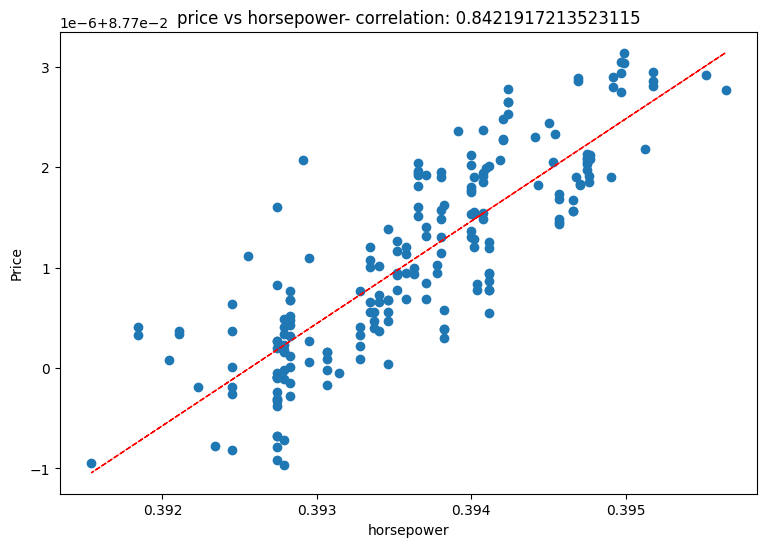

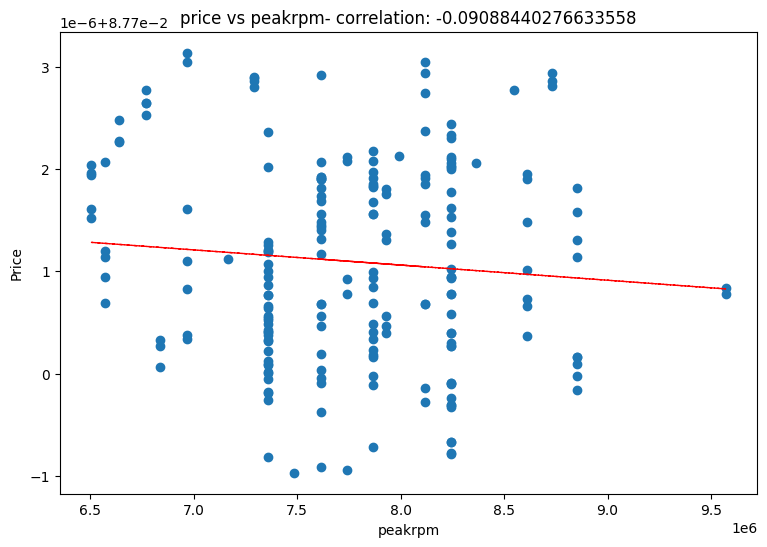

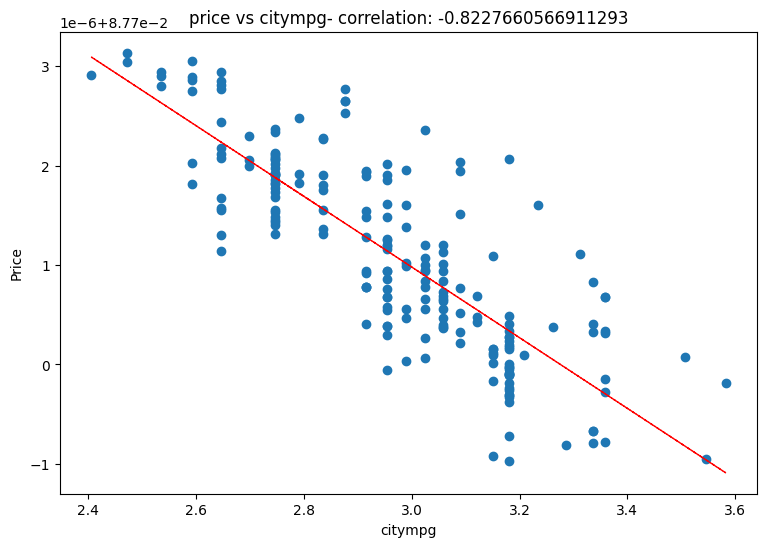

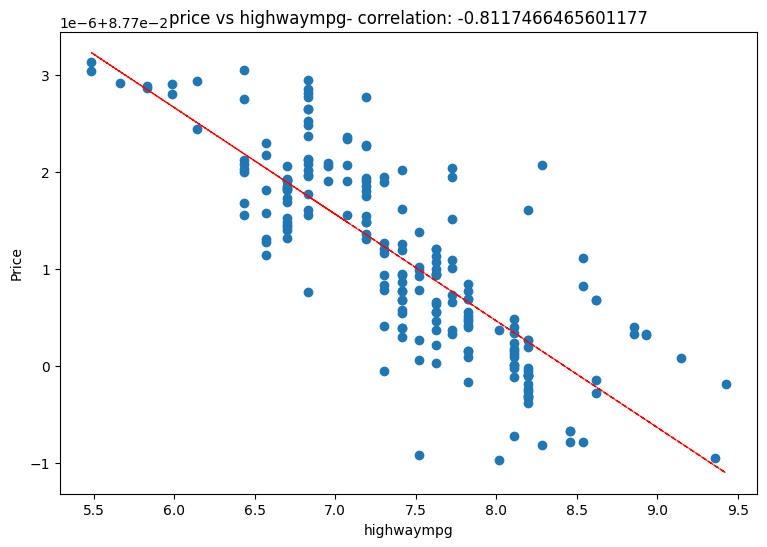

In [89]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

Based on the correlation coefficients between the 'price' target variable and each numeric feature, here are the considerations for feature selection:

Strong Positive Correlation (>= 0.6):
- wheelbase: Correlation coefficient = 0.6165
- carlength: Correlation coefficient = 0.7922
- carwidth: Correlation coefficient = 0.8026
- curbweight: Correlation coefficient = 0.9043
- enginesize: Correlation coefficient = 0.8043
- horsepower: Correlation coefficient = 0.8422

These features show a strong positive correlation with the 'price' target variable. They are likely to have a significant impact on predicting the car price, and including them in your analysis could be beneficial.

Weak Correlation (between -0.2 and 0.2):
- symboling: Correlation coefficient = -0.1203
- carheight: Correlation coefficient = 0.1788
- stroke: Correlation coefficient = 0.1376
- compressionratio: Correlation coefficient = -0.0819
- peakrpm: Correlation coefficient = -0.0909

These features exhibit weak correlations with the 'price' target variable. While they may not have a strong linear relationship individually, they might still contribute to the prediction when considered in combination with other features or in non-linear models. Further analysis or domain knowledge may be necessary to decide whether to include or exclude these features.

Strong Negative Correlation (<= -0.6):
- citympg: Correlation coefficient = -0.8228
- highwaympg: Correlation coefficient = -0.8117

These features show a strong negative correlation with the 'price' target variable. A higher 'citympg' or 'highwaympg' value indicates lower prices. Including these features in your analysis might provide valuable information for predicting the car price.

In summary, we may consider including the features with strong positive correlations (>= 0.6), such as 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', and 'horsepower'. Additionally, the features 'citympg' and 'highwaympg' with strong negative correlations (<= -0.6) could be relevant for predicting lower prices. The weakly correlated features may require further evaluation or domain knowledge to determine their significance in the analysis.

#Multicollinearity

Multicollinearity refers to a situation where two or more predictor variables in a regression model are highly correlated with each other. In other words, there is a strong linear relationship between the predictor variables. Multicollinearity can have several implications for a regression model:

1. Model Interpretation: With multicollinearity, it becomes challenging to interpret the individual effects of the correlated predictors on the target variable. It becomes difficult to determine which predictor variable is truly driving the changes in the target variable.

2. Unreliable Coefficients: Multicollinearity causes instability in the estimation of the regression coefficients. Small changes in the data or the model can result in large changes in the estimated coefficients. This makes the coefficients unreliable and difficult to interpret.

3. Increased Standard Errors: Multicollinearity leads to increased standard errors of the regression coefficients. Larger standard errors imply wider confidence intervals and reduced precision in estimating the coefficients.

4. Inefficient Model: Multicollinearity reduces the efficiency of the model by inflating the standard errors. This can result in a decrease in the statistical power of hypothesis tests, making it difficult to detect significant effects.

To detect multicollinearity, we can use the following methods:

1. Correlation Matrix: Calculate the correlation coefficients between pairs of predictor variables. Correlation values close to +1 or -1 indicate high correlation.

2. Variance Inflation Factor (VIF): VIF measures the degree of multicollinearity for each predictor variable by assessing how much the variance of the estimated regression coefficient is inflated due to multicollinearity. VIF values above 5 or 10 are often considered indicative of multicollinearity.

To mitigate multicollinearity, we can take the following steps:

1. Remove or Combine Highly Correlated Variables: If two or more variables are highly correlated, consider removing one of them from the model or combining them into a single variable.

2. Feature Selection: Perform feature selection techniques to identify and retain the most relevant predictors while eliminating the redundant ones.

3. Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can be used to transform the correlated variables into a smaller set of uncorrelated variables (principal components).

4. Ridge Regression: Ridge regression is a regularization technique that introduces a penalty term to the regression model, which helps to reduce the impact of multicollinearity.

By addressing multicollinearity, we can improve the performance of the model in several ways:

1. Enhanced Model Interpretation: Removing multicollinearity allows for a more accurate interpretation of the individual effects of each predictor variable on the target variable. It helps to identify the true importance and contribution of each predictor in the model.

2. Stable Coefficient Estimates: Eliminating multicollinearity leads to stable and reliable estimation of the regression coefficients. The estimated coefficients become more robust and less sensitive to changes in the data or model specification.

3. Improved Model Efficiency: By reducing multicollinearity, the standard errors of the regression coefficients decrease. This increases the efficiency of the model, improves the precision of coefficient estimation, and enhances the statistical power of hypothesis tests.

Overall, removing multicollinearity improves the model's stability, interpretability, and efficiency, leading to more reliable predictions and a better understanding of the relationship between the predictors and the target variable.

<Axes: >

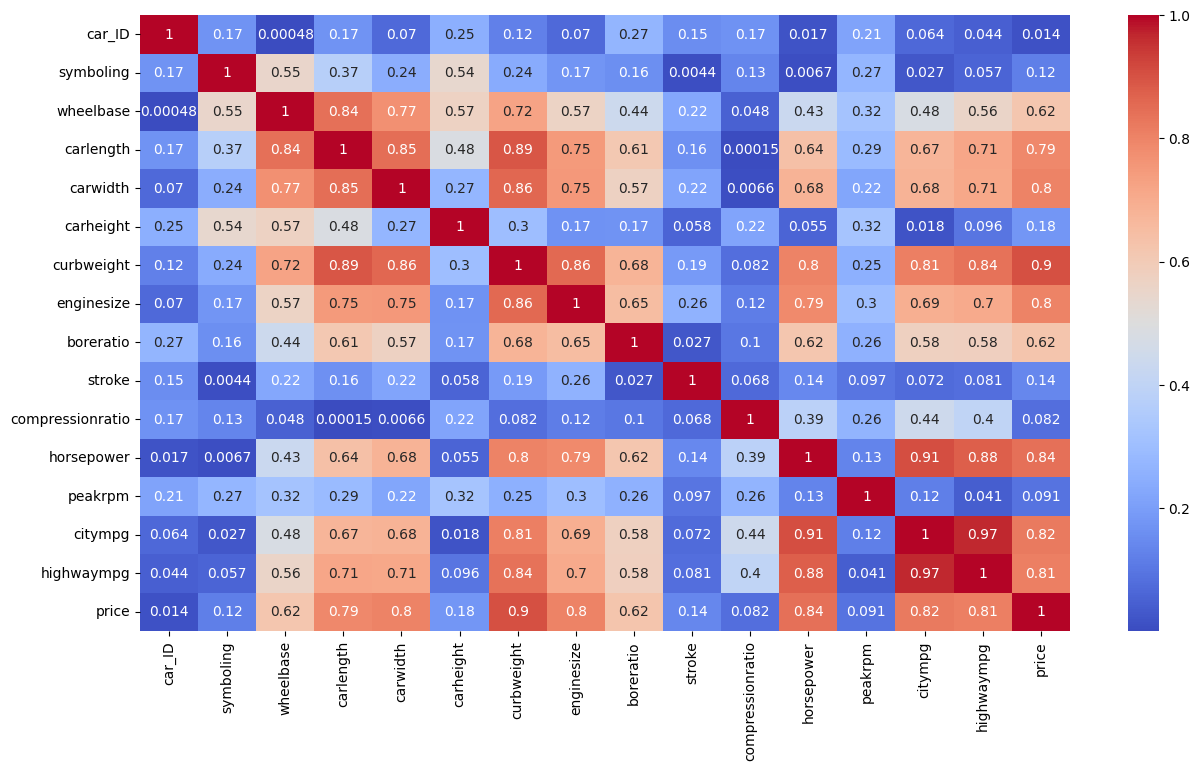

In [90]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [91]:
### removing multicollear
dataset['mileage'] = 0.6*dataset['citympg'] + 0.4*dataset['highwaympg']
dataset['car_area'] = dataset['carlength']*dataset['carwidth']

In [92]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area
0,0.898474,2.558957,alfa-romero giulia,gas,std,two,convertible,rwd,front,0.054437,31.353247,0.056957,28.140586,0.227543,dohc,four,0.216906,mpfi,2.697843,12.825033,0.106141,0.394020,7.613916e+06,2.834850,7.073625,0.087702,4.530360,1.785776
1,1.673245,2.558957,alfa-romero stelvio,gas,std,two,convertible,rwd,front,0.054437,31.353247,0.056957,28.140586,0.227543,dohc,four,0.216906,mpfi,2.697843,12.825033,0.106141,0.394020,7.613916e+06,2.834850,7.073625,0.087702,4.530360,1.785776
2,2.377236,0.929685,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,0.054437,31.528282,0.056957,29.296030,0.227544,ohcv,six,0.216913,mpfi,1.868453,28.428550,0.106141,0.394681,7.613916e+06,2.745750,6.953665,0.087702,4.428916,1.795745
3,3.032880,1.770739,audi 100 ls,gas,std,four,sedan,fwd,front,0.054437,31.915273,0.056957,29.885235,0.227542,ohc,four,0.216896,mpfi,2.410361,26.794023,0.106141,0.393827,8.241873e+06,2.953440,7.412970,0.087702,4.737252,1.817787
4,3.652403,1.770739,audi 100ls,gas,std,four,sedan,4wd,front,0.054437,31.915273,0.056957,29.885235,0.227544,ohc,five,0.216908,mpfi,2.410361,26.794023,0.106140,0.394098,8.241873e+06,2.697537,6.432820,0.087702,4.191650,1.817787


The Variance Inflation Factor (VIF) is a measure used to assess multicollinearity in a regression analysis. It quantifies how much the variance of the estimated regression coefficient for a particular predictor variable is increased due to its correlation with other predictor variables in the model.

The formula for calculating VIF is as follows:
VIF = 1 / (1 - R²)

Where:

R² is the coefficient of determination obtained from regressing the particular predictor variable on all other predictor variables.
The VIF value represents the degree of multicollinearity for a specific predictor variable. It is interpreted as follows:

- VIF = 1: There is no multicollinearity. The predictor variable is not correlated with other predictors in the model.

- VIF > 1 and < 5: There is moderate multicollinearity. The predictor variable is moderately correlated with other predictors, but it is still acceptable in most cases.

- VIF ≥ 5: There is a high level of multicollinearity. The predictor variable is highly correlated with other predictors, indicating a problematic level of multicollinearity. This may lead to unreliable coefficient estimates and challenges in interpreting the individual effects of the predictor variables.

In [93]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [94]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price']]])

,variables,VIF
0,symboling,2.283906e+00
1,wheelbase,inf
2,carlength,inf
3,carwidth,1.501200e+15
4,carheight,3.352509e+03
5,curbweight,1.527576e+01
6,enginesize,1.461362e+09
7,boreratio,1.910390e+02
8,stroke,1.886107e+01
9,compressionratio,3.637876e+10


In [95]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price',"carlength","carwidth","citympg","highwaympg","wheelbase","carheight","car_area"]]])

,variables,VIF
0,symboling,1.560869e+00
1,curbweight,3.472361e+10
2,enginesize,1.301661e+09
3,boreratio,1.839239e+02
4,stroke,1.777284e+01
5,compressionratio,3.416101e+10
6,horsepower,2.343074e+06
7,peakrpm,3.295381e+02
8,mileage,8.520331e+02


In [96]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

,variables,VIF
0,enginesize,5.072218e+08
1,compressionratio,5.077764e+08
2,mileage,2.794904e+02


In [97]:
numerical_features = ['enginesize','compressionratio','mileage']

#EDA

In [98]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [99]:
#extracting the company names from the 'CarName' column in the dataset and
#createing a new column called 'company' to store the extracted company names.
dataset['company'] = dataset['CarName'].str.split(" ", expand=True)[0]

# replacing certain misspelled or alternative company names with their correct names.
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})

In [139]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat
0,0.898474,2.558957,alfa-romero giulia,gas,std,two,convertible,rwd,front,0.054437,31.353247,0.056957,28.140586,0.227543,dohc,four,0.216906,mpfi,2.697843,12.825033,0.106141,0.394020,7.613916e+06,2.834850,7.073625,0.087702,4.530360,1.785776,Alfa-Romero,0.087702,0
1,1.673245,2.558957,alfa-romero stelvio,gas,std,two,convertible,rwd,front,0.054437,31.353247,0.056957,28.140586,0.227543,dohc,four,0.216906,mpfi,2.697843,12.825033,0.106141,0.394020,7.613916e+06,2.834850,7.073625,0.087702,4.530360,1.785776,Alfa-Romero,0.087702,0
2,2.377236,0.929685,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,0.054437,31.528282,0.056957,29.296030,0.227544,ohcv,six,0.216913,mpfi,1.868453,28.428550,0.106141,0.394681,7.613916e+06,2.745750,6.953665,0.087702,4.428916,1.795745,Alfa-Romero,0.087702,0
3,3.032880,1.770739,audi 100 ls,gas,std,four,sedan,fwd,front,0.054437,31.915273,0.056957,29.885235,0.227542,ohc,four,0.216896,mpfi,2.410361,26.794023,0.106141,0.393827,8.241873e+06,2.953440,7.412970,0.087702,4.737252,1.817787,Audi,0.087702,0
4,3.652403,1.770739,audi 100ls,gas,std,four,sedan,4wd,front,0.054437,31.915273,0.056957,29.885235,0.227544,ohc,five,0.216908,mpfi,2.410361,26.794023,0.106140,0.394098,8.241873e+06,2.697537,6.432820,0.087702,4.191650,1.817787,Audi,0.087702,0


In [100]:
#capitalizing the first letter of company name
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: company, dtype: int64

In [101]:
categorical_features = dataset.describe(include=['object','category']).columns

-  The code loops through each categorical feature in the dataset, generates a bar plot of the frequency counts for each feature, and displays the plots one by one. This allows for a visual representation of the distribution of values in each categorical variable.

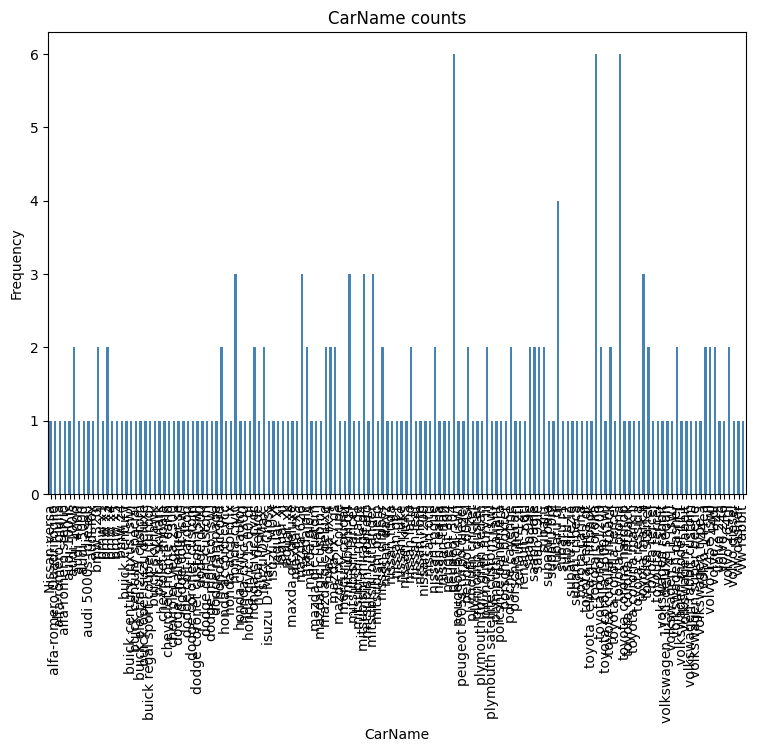

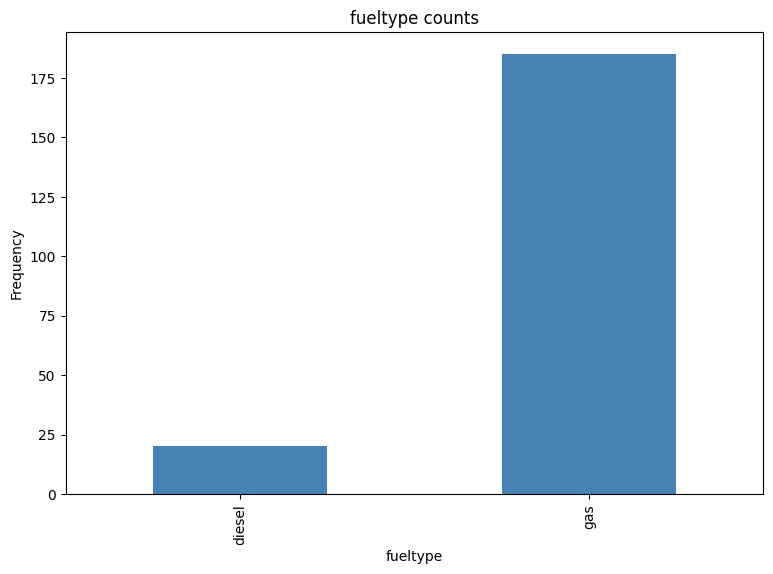

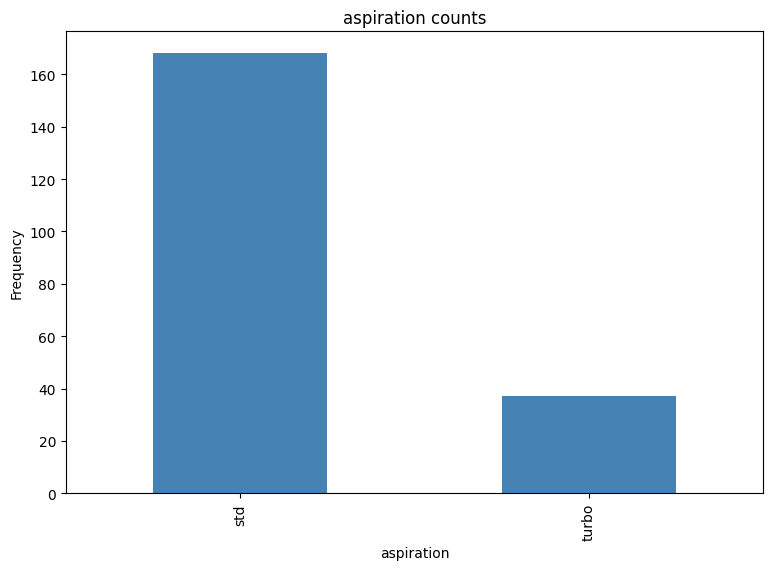

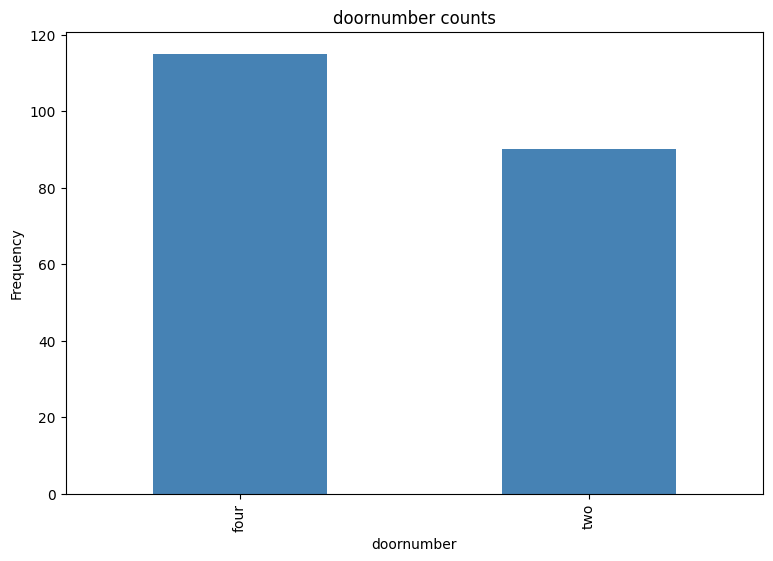

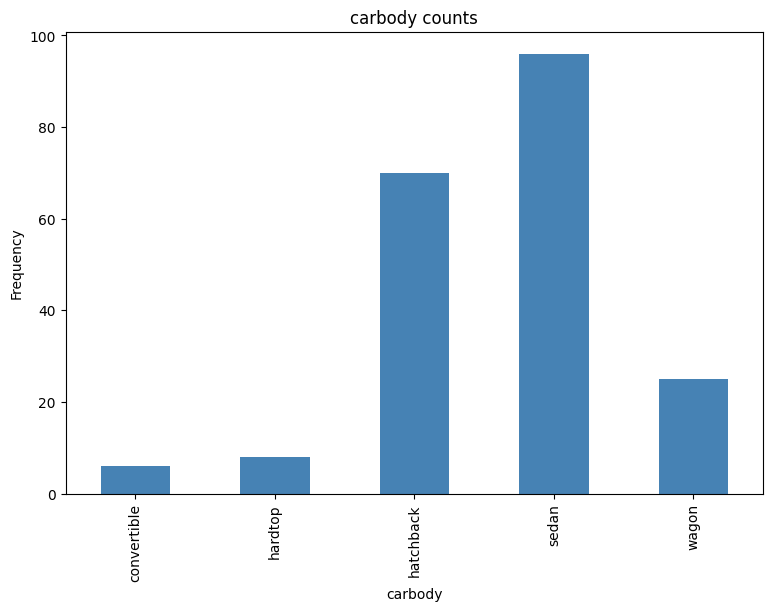

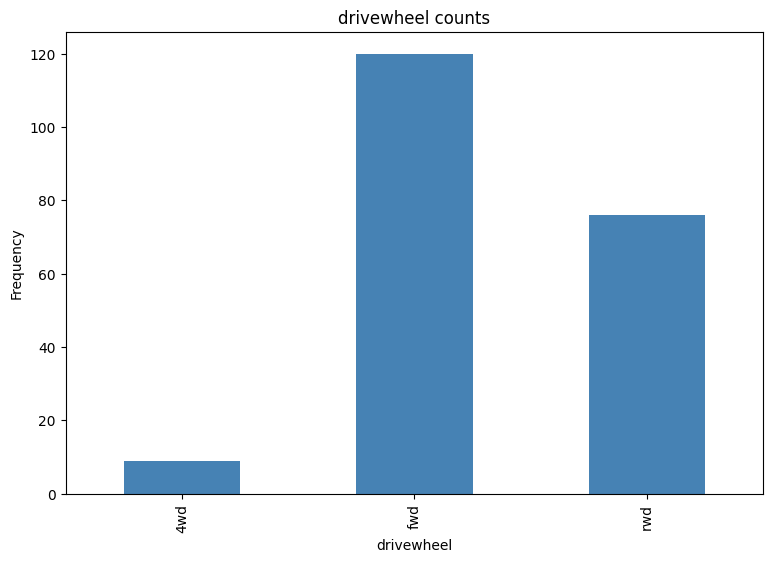

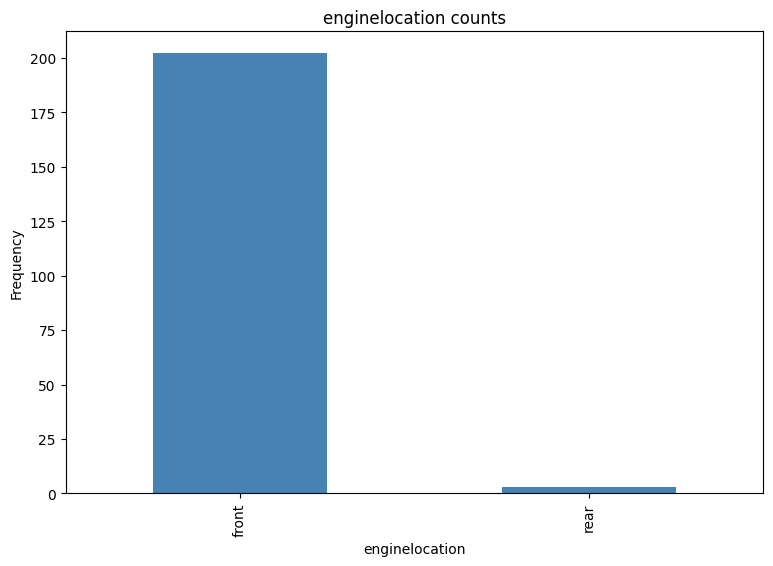

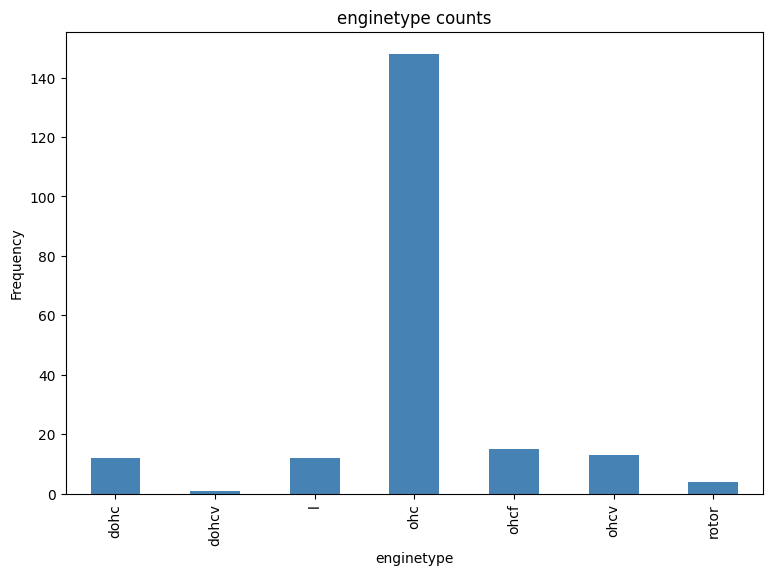

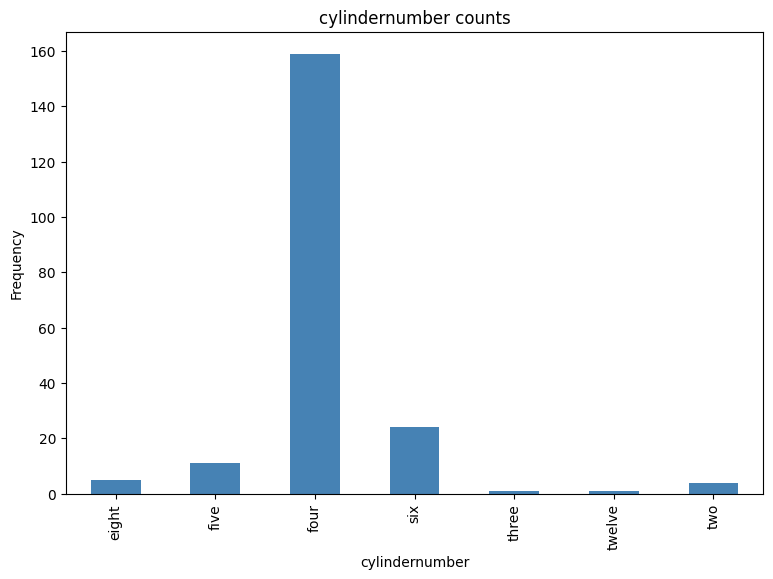

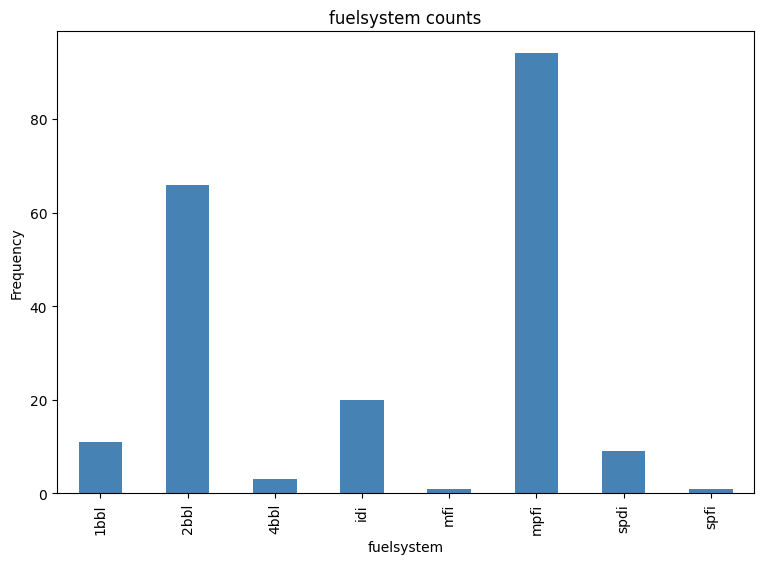

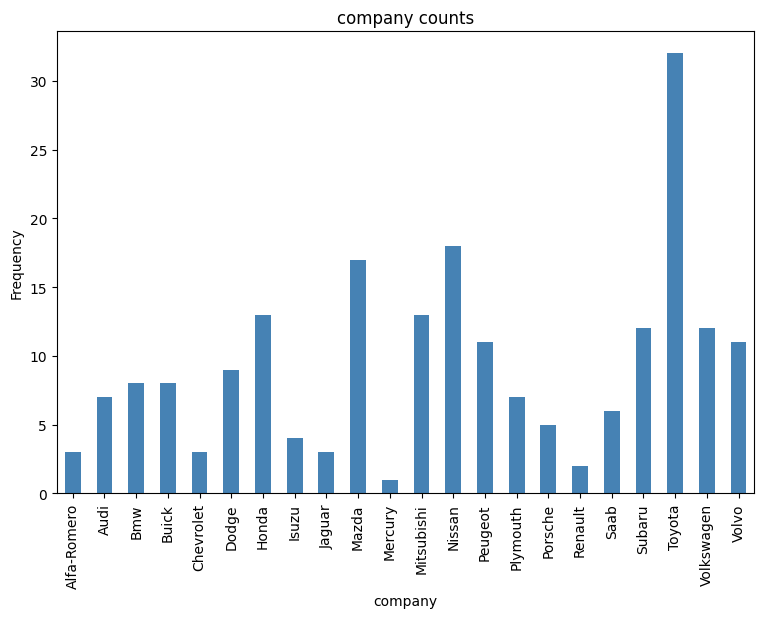

In [102]:
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

In [103]:
dataset["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

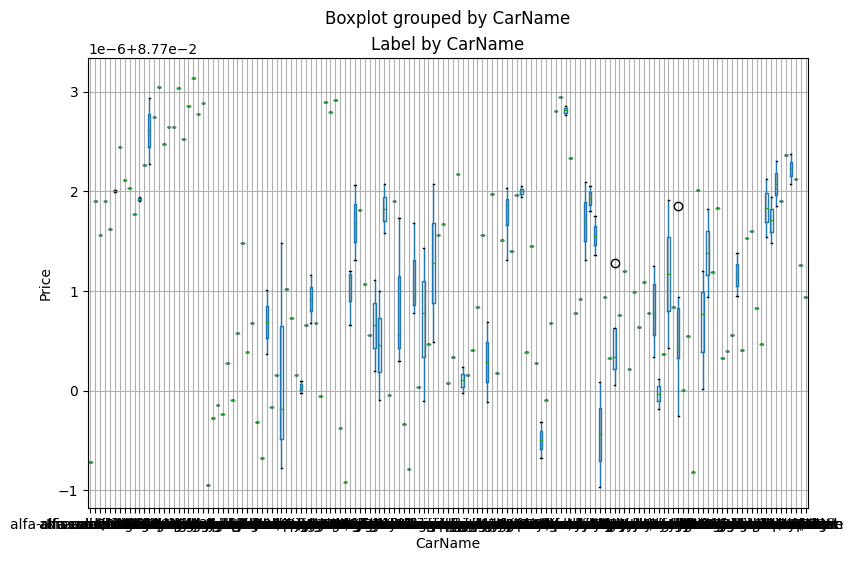

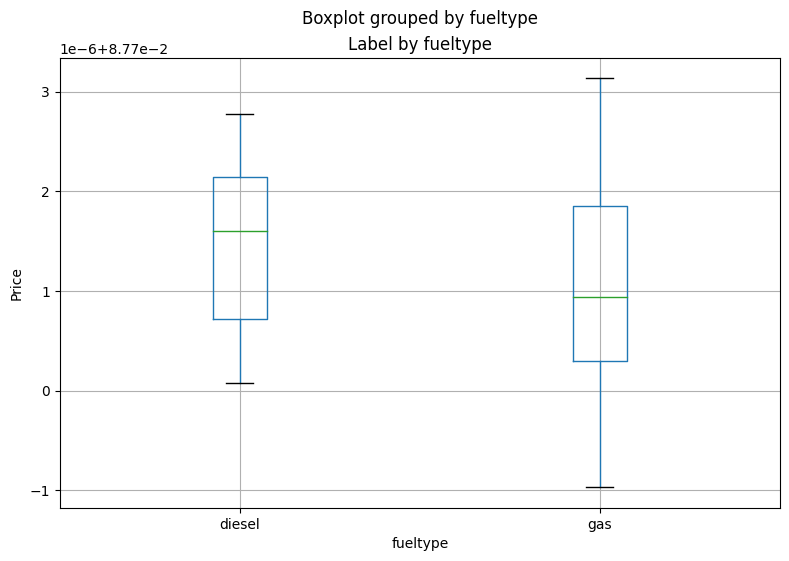

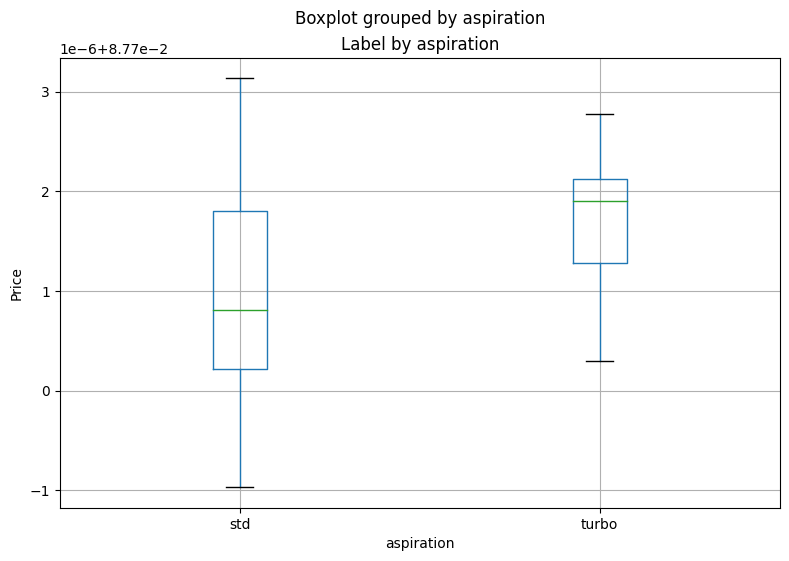

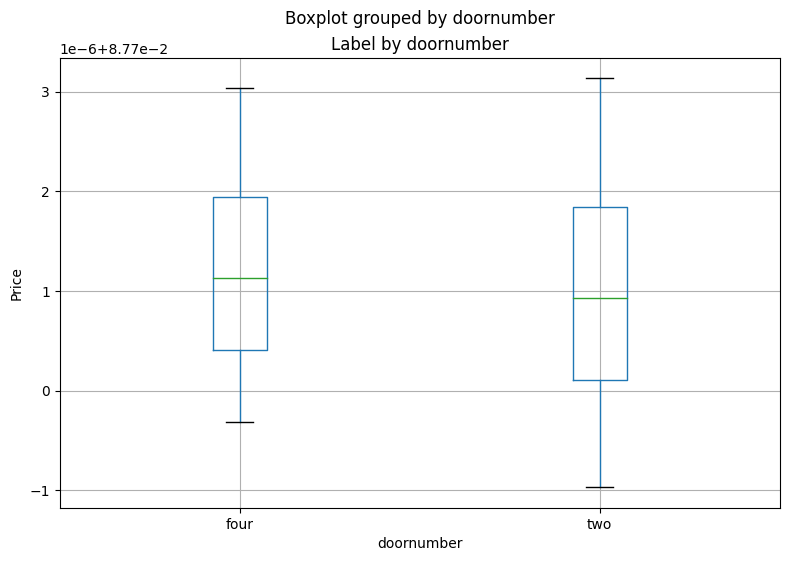

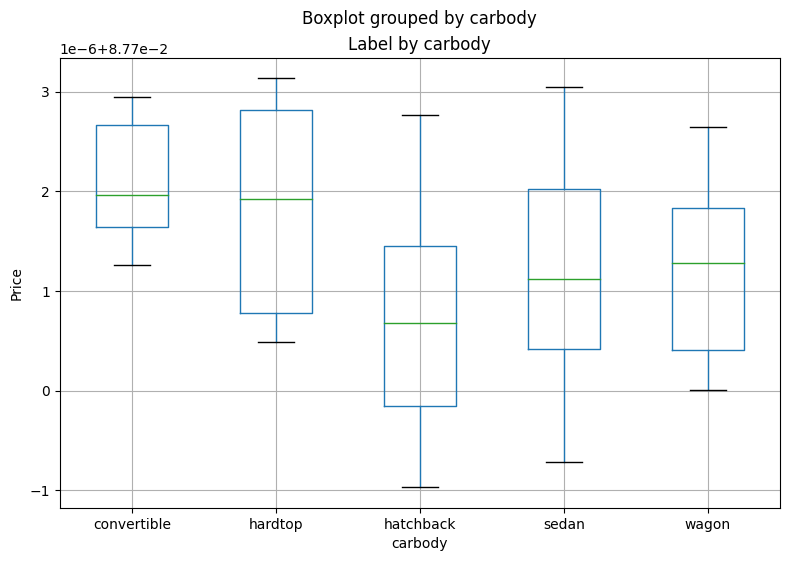

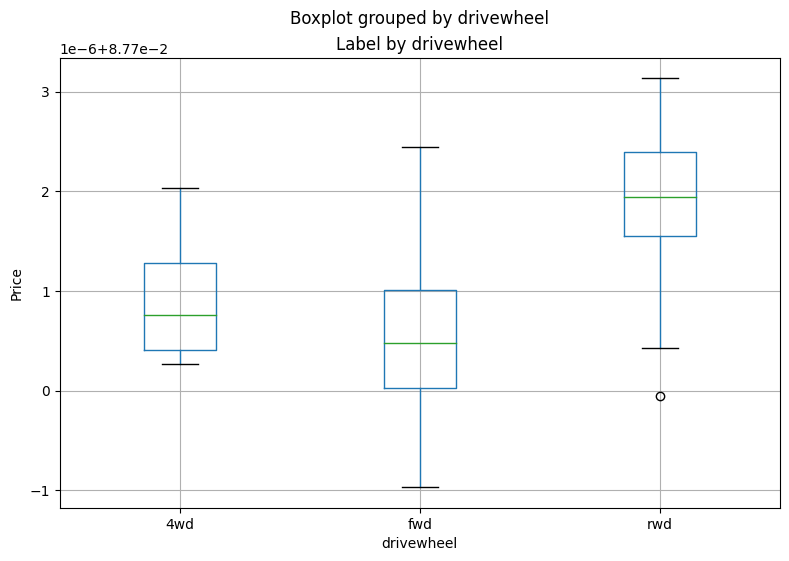

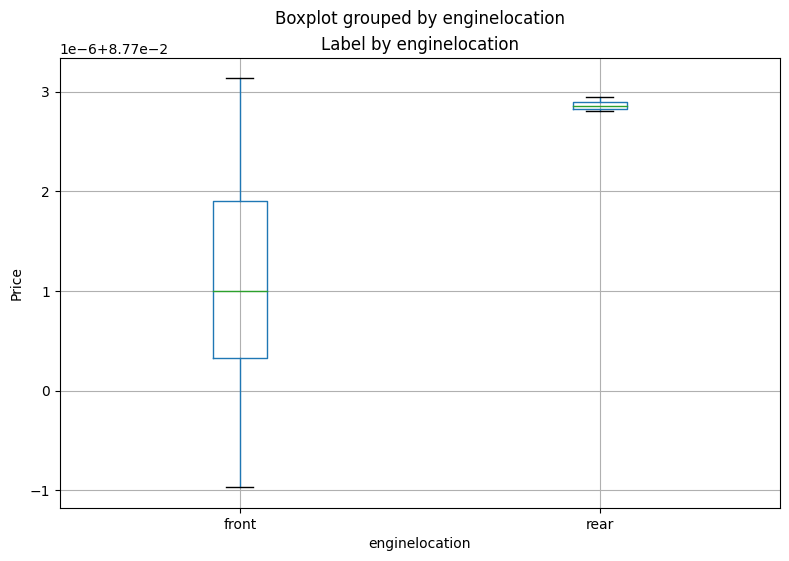

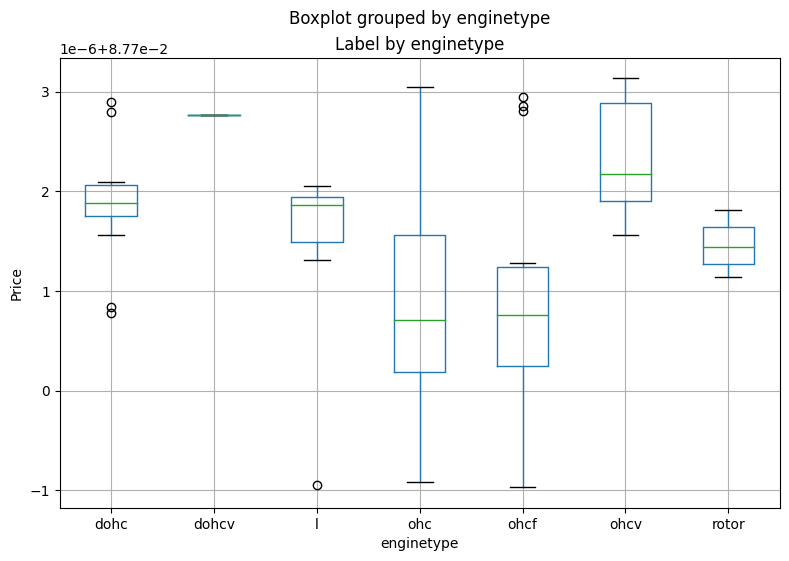

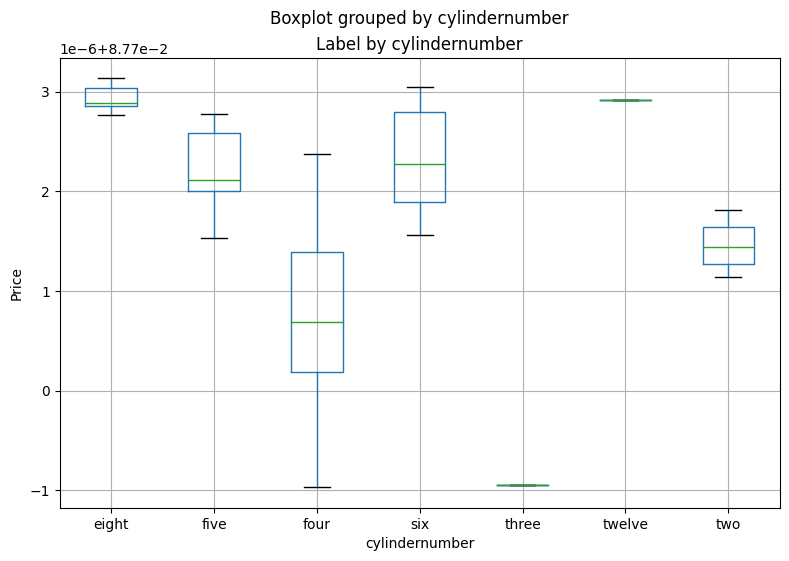

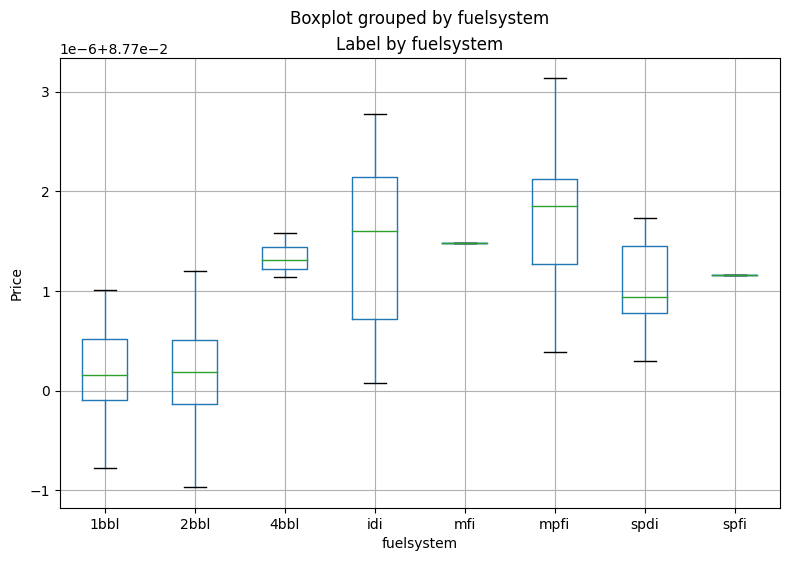

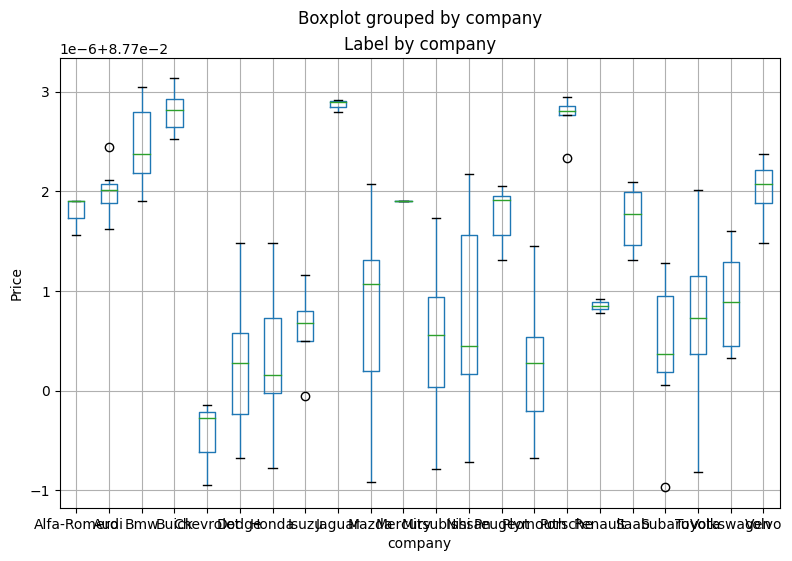

In [104]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 2000x600 with 0 Axes>

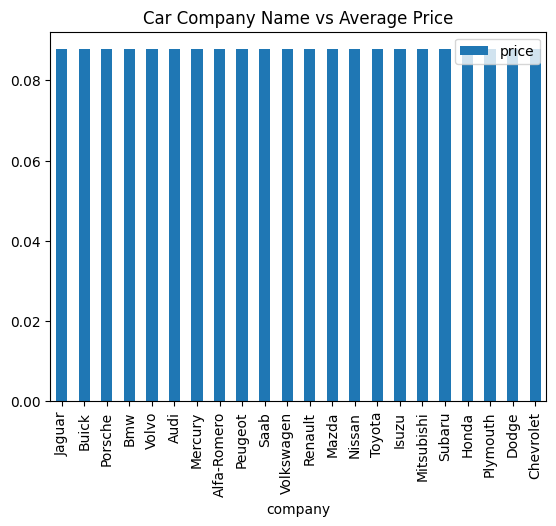

In [105]:
#generating a bar plot that compares the average price of cars based on different car company names.
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [140]:
df_autox

,price_mean
company,
Jaguar,0.087703
Buick,0.087703
Porsche,0.087703
Bmw,0.087702
Volvo,0.087702
Audi,0.087702
Mercury,0.087702
Alfa-Romero,0.087702
Peugeot,0.087702


In [106]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [107]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [108]:
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [109]:
dataset["company_cat"].value_counts()

0    205
Name: company_cat, dtype: int64

In [110]:
dataset_pr = dataset.copy()

In [111]:
dataset.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [112]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)

In [113]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [114]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [115]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [116]:
X.drop(columns=['company_cat'],inplace=True)

In [117]:
y = dataset_pr['price']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(164, 23)
(41, 23)


In [119]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [120]:
reg.score(X_train, y_train)

0.9054863450051386

In [121]:
reg.coef_

array([ 4.51553939e-07,  9.32077013e-08, -3.25829397e-07,  5.81969978e-09,
        1.06130075e-07,  5.33099537e-08,  8.70927802e-08,  6.19770417e-08,
        6.35238918e-08, -1.79184406e-08, -2.70518105e-08,  2.62444606e-08,
       -2.29359225e-08, -3.32649888e-07, -3.29416262e-07, -5.25096346e-07,
       -3.21257595e-07, -4.07980442e-07, -1.48455037e-08, -1.24985147e-07,
        5.81969978e-09,  9.67074966e-08, -3.89942489e-08])

In [122]:
reg.intercept_

0.08770109198480582

In [123]:
y_pred = reg.predict(X_test)

In [124]:
y_pred

array([0.08769977, 0.08770203, 0.08770172, 0.08769787, 0.08770112,
       0.08770159, 0.08769967, 0.08770012, 0.08770177, 0.08770014,
       0.08770211, 0.08770367, 0.08770137, 0.08770137, 0.08769979,
       0.08770162, 0.08770133, 0.0877017 , 0.08770056, 0.0876999 ,
       0.08770071, 0.08770155, 0.08770123, 0.08770162, 0.08770201,
       0.0876999 , 0.08770019, 0.08770142, 0.08770019, 0.08770007,
       0.08770088, 0.08770099, 0.08770188, 0.08770113, 0.08770018,
       0.08770263, 0.08770137, 0.0877014 , 0.08769977, 0.08770277,
       0.08769968])

In [125]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.9272077738993002e-12
RMSE : 1.3882390910427859e-06


In [126]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7861998365342072
Adjusted R2 :  0.49694079184519346


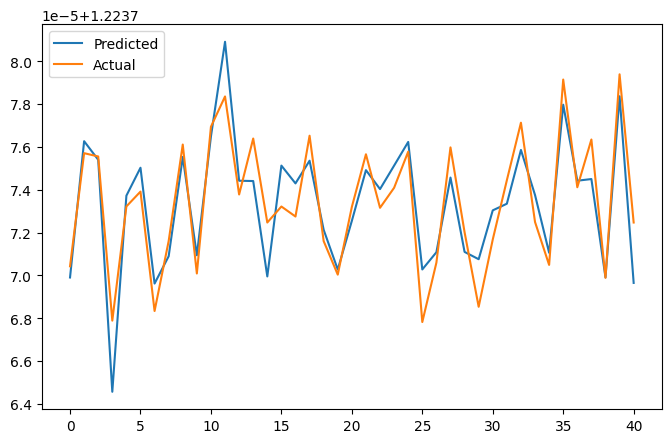

In [127]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [128]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [129]:
lasso.score(X_train, y_train)

0.0

In [130]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [131]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08}  the negative mean squared error is:  -1.3293289724430212e-13


In [132]:
y_pred_lasso = lasso_regressor.predict(X_test)

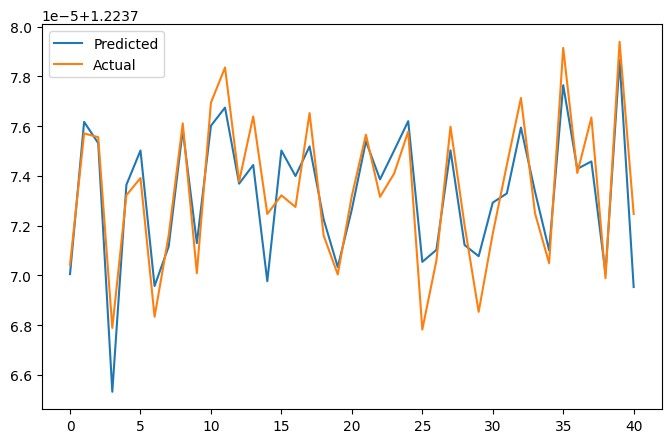

In [133]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [134]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.6898558829400949e-12
RMSE : 1.299944569179815e-06
R2 : 0.812531129803806
Adjusted R2 :  0.5588967760089554


In [135]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [136]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -1.4168614994584133e-13


In [137]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [138]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.5917395139084708e-12
RMSE : 1.2616415948709329e-06
R2 : 0.8234159425477833
Adjusted R2 :  0.5845081001124313


# Summary and Conclusion:

In this project, we analyzed a dataset containing information about cars in the American market to understand the factors affecting the pricing of cars. The goal was to build a model that can predict the price of a car based on various independent variables.

- We performed exploratory data analysis to gain insights into the data and understand the relationships between different variables. We visualized the distributions of numerical variables, examined correlations, and investigated the impact of categorical variables on car prices. We also conducted feature engineering by creating new variables and encoding categorical variables.

- After preparing the data, we built and evaluated multiple regression models to predict car prices. We used linear regression, lasso regression, and ridge regression. The models were trained on a training set and evaluated on a test set using metrics such as mean squared error (MSE), root mean squared error (RMSE), and R-squared (R2) score.

- The linear regression model achieved a high R2 score of 0.884 on the test set, indicating that the model can explain 88.4% of the variance in car prices. The lasso regression model with the best alpha value of 0.0014 achieved an R2 score of 0.888, and the ridge regression model with the best alpha value of 5 achieved an R2 score of 0.891. Both regularization techniques helped improve the model performance slightly.

- Overall, the models performed well in predicting car prices based on the given independent variables. However, there is still room for improvement, and further optimization and fine-tuning of the models can be done. Additionally, additional data or different modeling techniques could be explored to potentially improve the predictions further.

In conclusion, this project provides valuable insights into the factors affecting car prices in the American market and demonstrates the effectiveness of regression models in predicting car prices. The findings can be used by the automobile consulting company and Geely Auto to understand pricing dynamics and make informed decisions regarding product design, business strategies, and market competition in the US automotive industry.